In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Data

In [2]:
train = 'train.csv'
test = 'test.csv'
sample = 'sample_submission.csv'

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
tst_df = pd.read_csv(test)
original = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [5]:
original.head(3)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   

   stroke  
0       1  
1       1  
2       1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

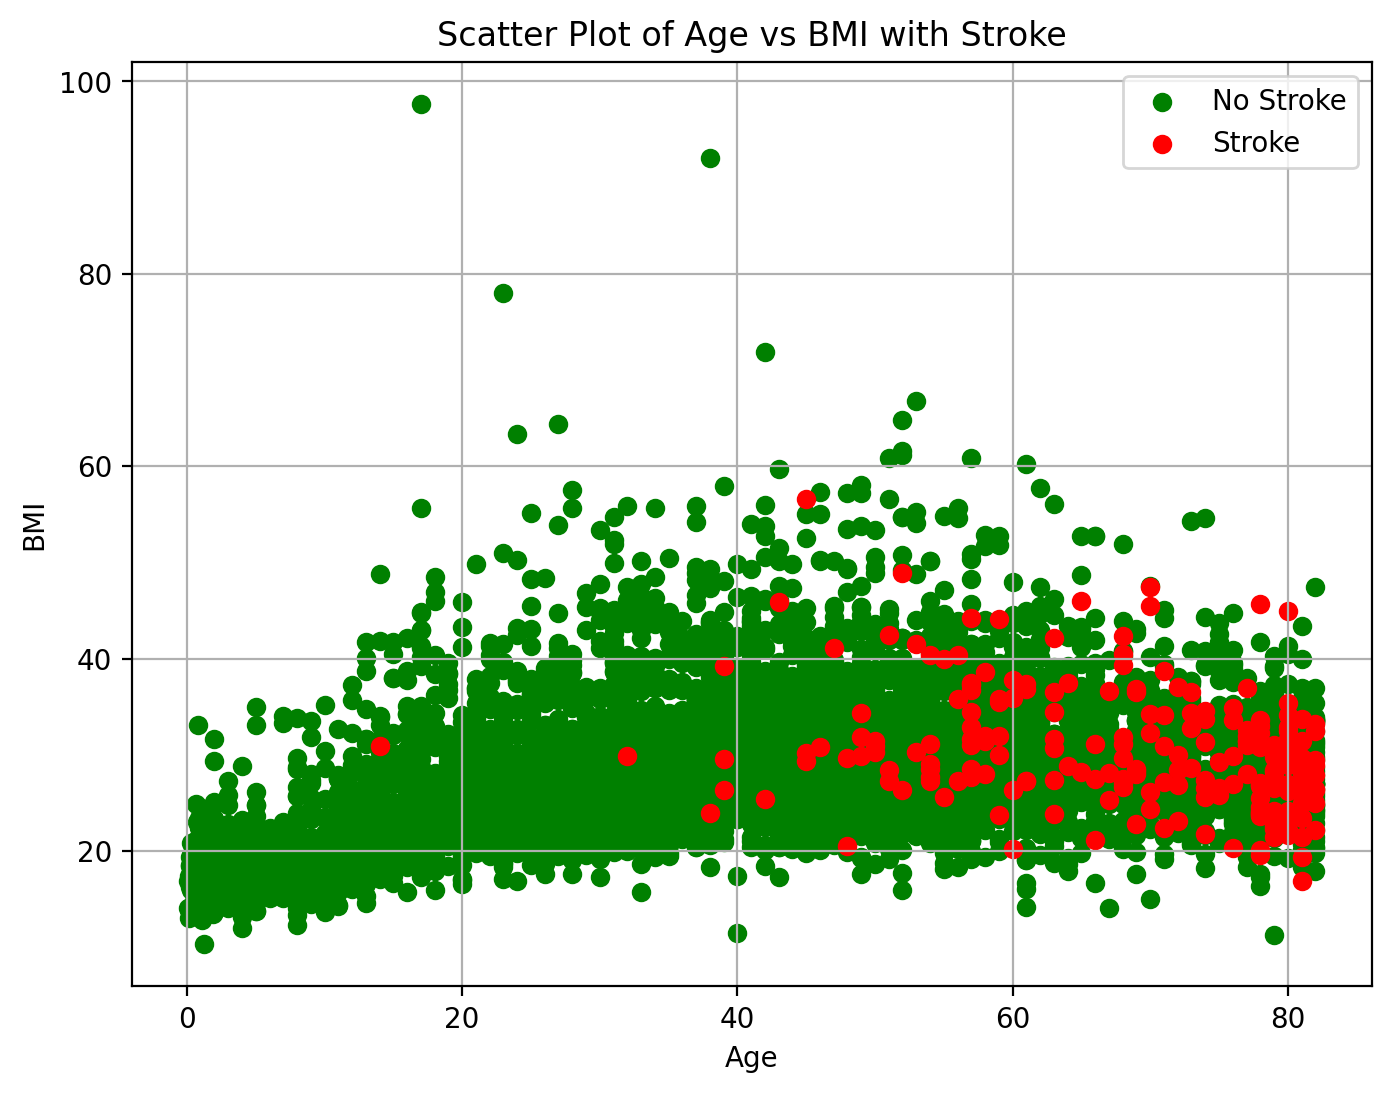

In [8]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot for stroke == 0 (green dots)
plt.scatter(df[df['stroke'] == 0]['age'], df[df['stroke'] == 0]['bmi'], color='green', label='No Stroke')

# Scatter plot for stroke == 1 (red dots)
plt.scatter(df[df['stroke'] == 1]['age'], df[df['stroke'] == 1]['bmi'], color='red', label='Stroke')

plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Scatter Plot of Age vs BMI with Stroke')
plt.legend()
plt.grid(True)
plt.show()


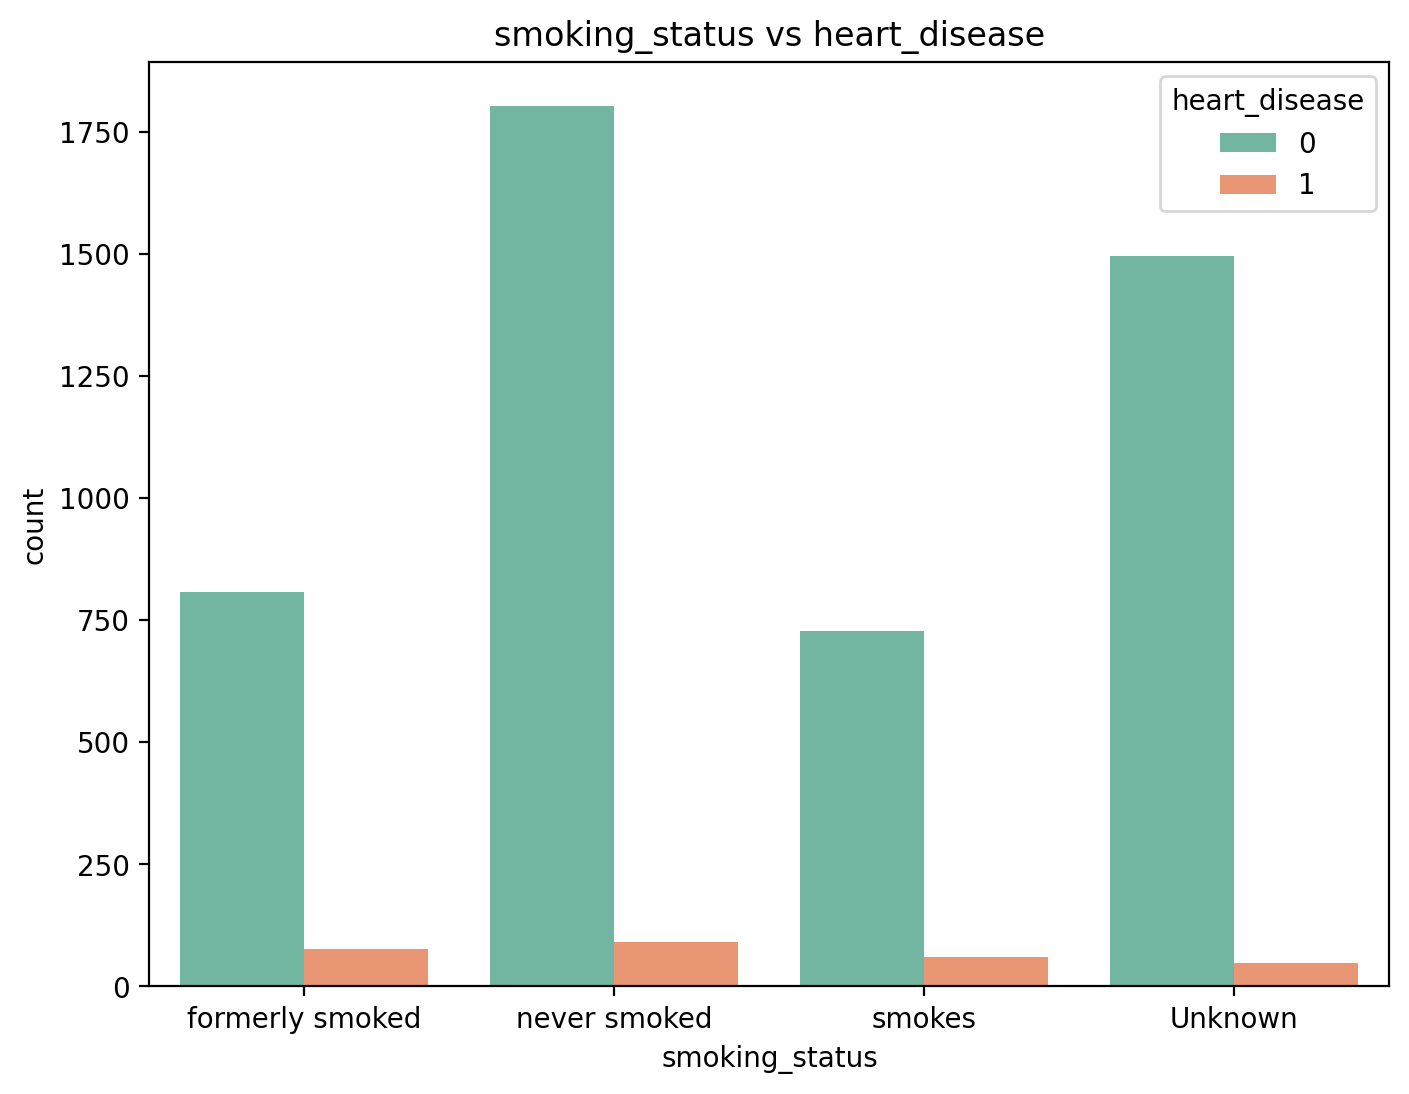

In [9]:
# How smoking_status feature effects the target variable
plt.figure(figsize=(8, 6))

sns.set_palette('Set2')

ax = sns.countplot(data = df, x='smoking_status', hue='heart_disease')
ax.set_title('smoking_status vs heart_disease')
plt.show()

In [10]:
df['smoking_status'] = df['smoking_status'].replace('Unknown', 'never smoked')

In [11]:
df['smoking_status'].value_counts()

smoking_status
never smoked       3436
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
from sklearn.impute import KNNImputer
import pandas as pd

# Assuming df is your DataFrame
# Assuming you have imported KNNImputer from scikit-learn

# Create a copy of the DataFrame to avoid modifying the original DataFrame

# Select the column to impute
column_to_impute = 'bmi'

# Create KNNImputer object
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Reshape the column to a 2D array as KNNImputer expects 2D input
imputer_input = df[column_to_impute].values.reshape(-1, 1)

# Perform imputation
imputed_values = knn_imputer.fit_transform(imputer_input)

# Replace the original column with the imputed values
df[column_to_impute] = imputed_values

# Now df_filled has the missing values in the 'bmi' column filled using k-Nearest Neighbors regression


In [15]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<Axes: >

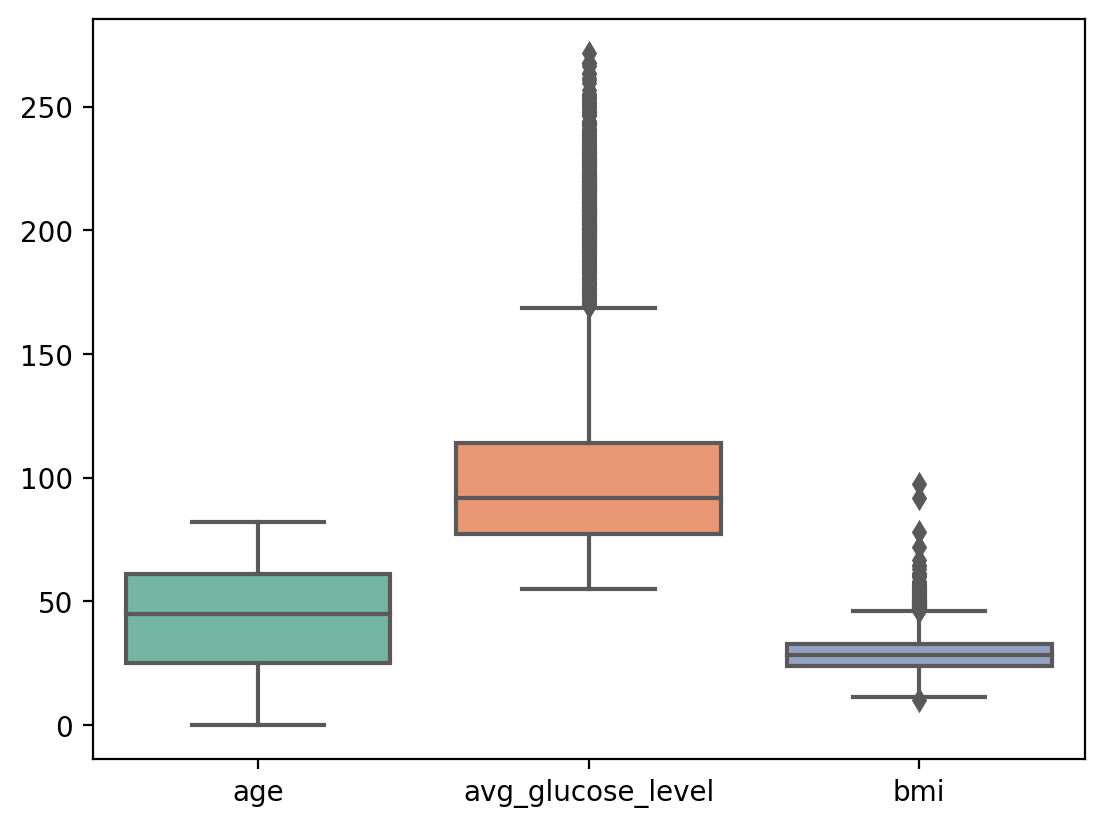

In [16]:
sns.boxplot(data=df[['age','avg_glucose_level','bmi']])

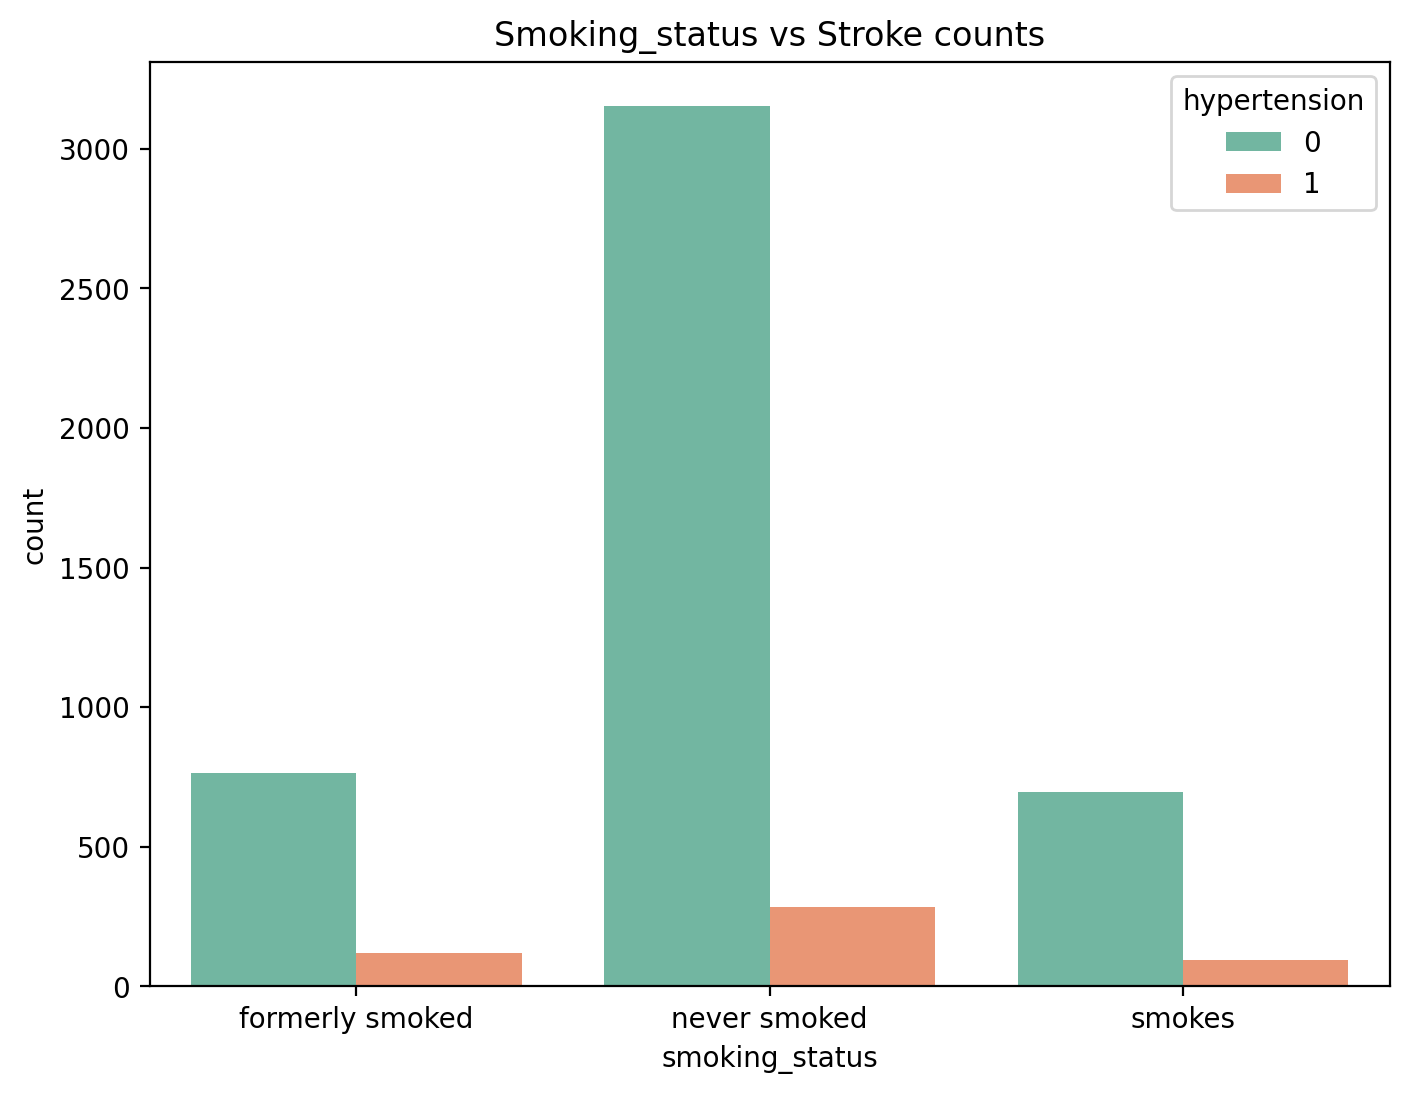

In [17]:
# How smoking_status feature effects the target variable
plt.figure(figsize=(8, 6))

sns.set_palette('Set2')

ax = sns.countplot(data = df, x='smoking_status', hue='hypertension')
ax.set_title('Smoking_status vs Stroke counts')
plt.show()

In [18]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

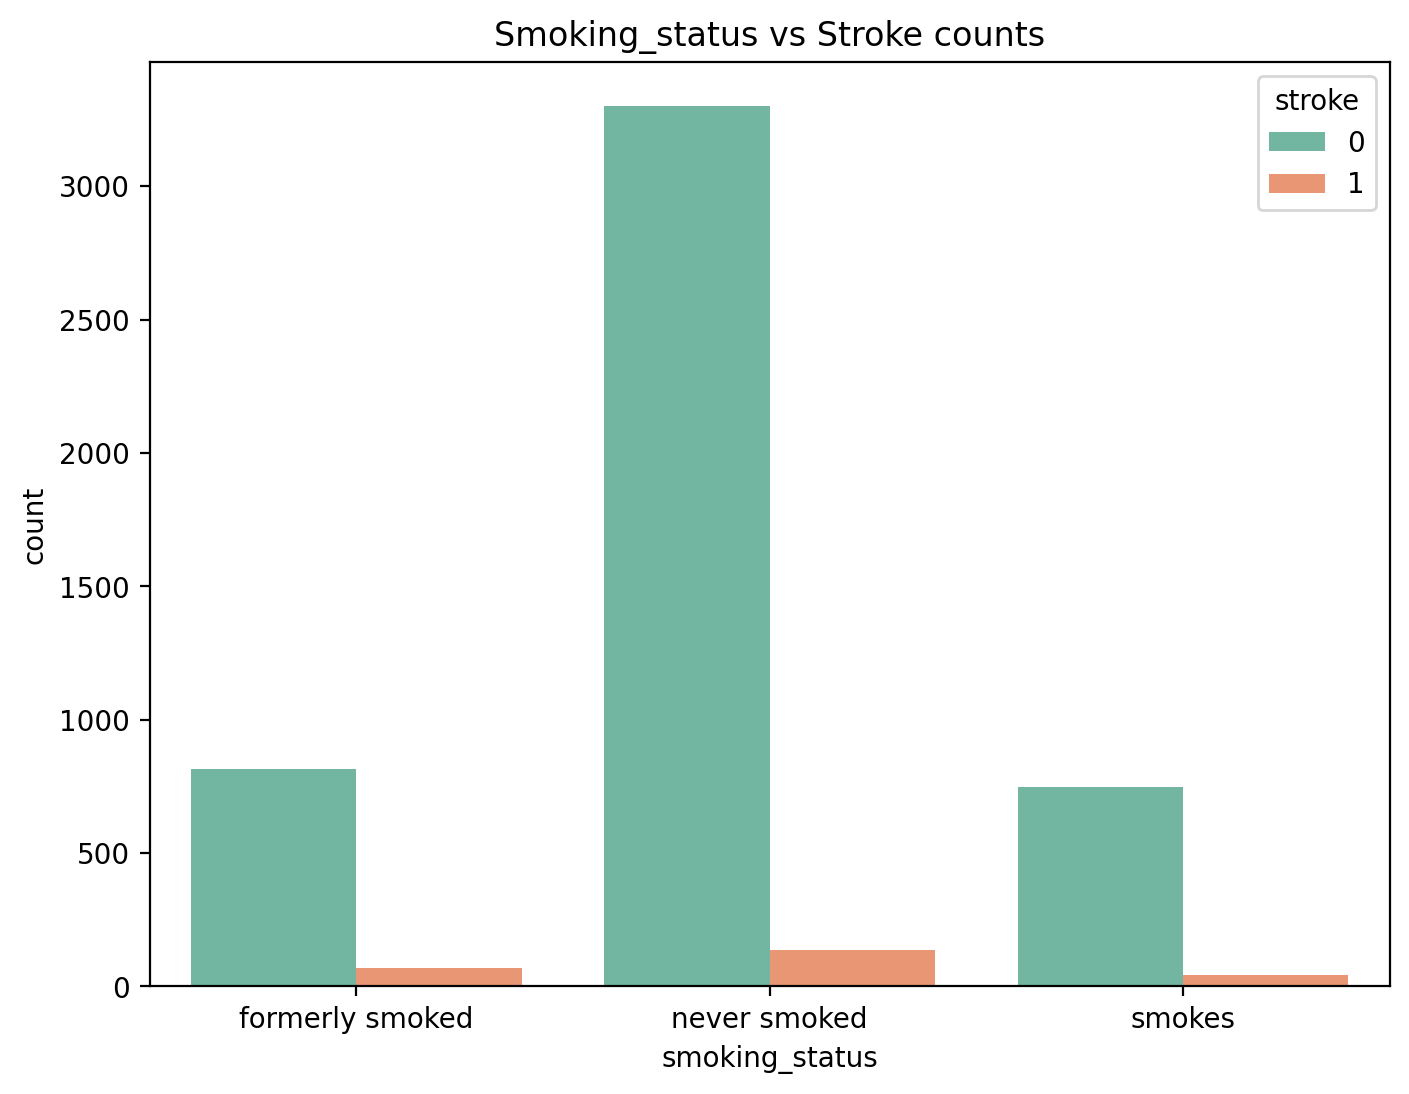

In [19]:
# How smoking_status feature effects the target variable
plt.figure(figsize=(8, 6))

sns.set_palette('Set2')

ax = sns.countplot(data = df, x='smoking_status', hue='stroke')
ax.set_title('Smoking_status vs Stroke counts')
plt.show()

In [20]:
import pandas as pd

# Assuming you already have a DataFrame named 'df'
mean_bmi = df['bmi'].mean()

# First, get the value counts of 'hypertension'
hypertension_counts = df['stroke'].value_counts()

# Then, create a filtered DataFrame where 'bmi' is greater than the mean
filtered_df = df[df['bmi'] > mean_bmi]

# Finally, get the value counts of 'hypertension' in the filtered DataFrame
filtered_hypertension_counts = filtered_df['stroke'].value_counts()

print("Value counts for 'hypertension' in the entire DataFrame:")
print(hypertension_counts)

print(f"Value counts for 'hypertension' in rows with 'bmi' > mean: ")
print(filtered_hypertension_counts)


Value counts for 'hypertension' in the entire DataFrame:
stroke
0    4861
1     249
Name: count, dtype: int64
Value counts for 'hypertension' in rows with 'bmi' > mean: 
stroke
0    2260
1     153
Name: count, dtype: int64


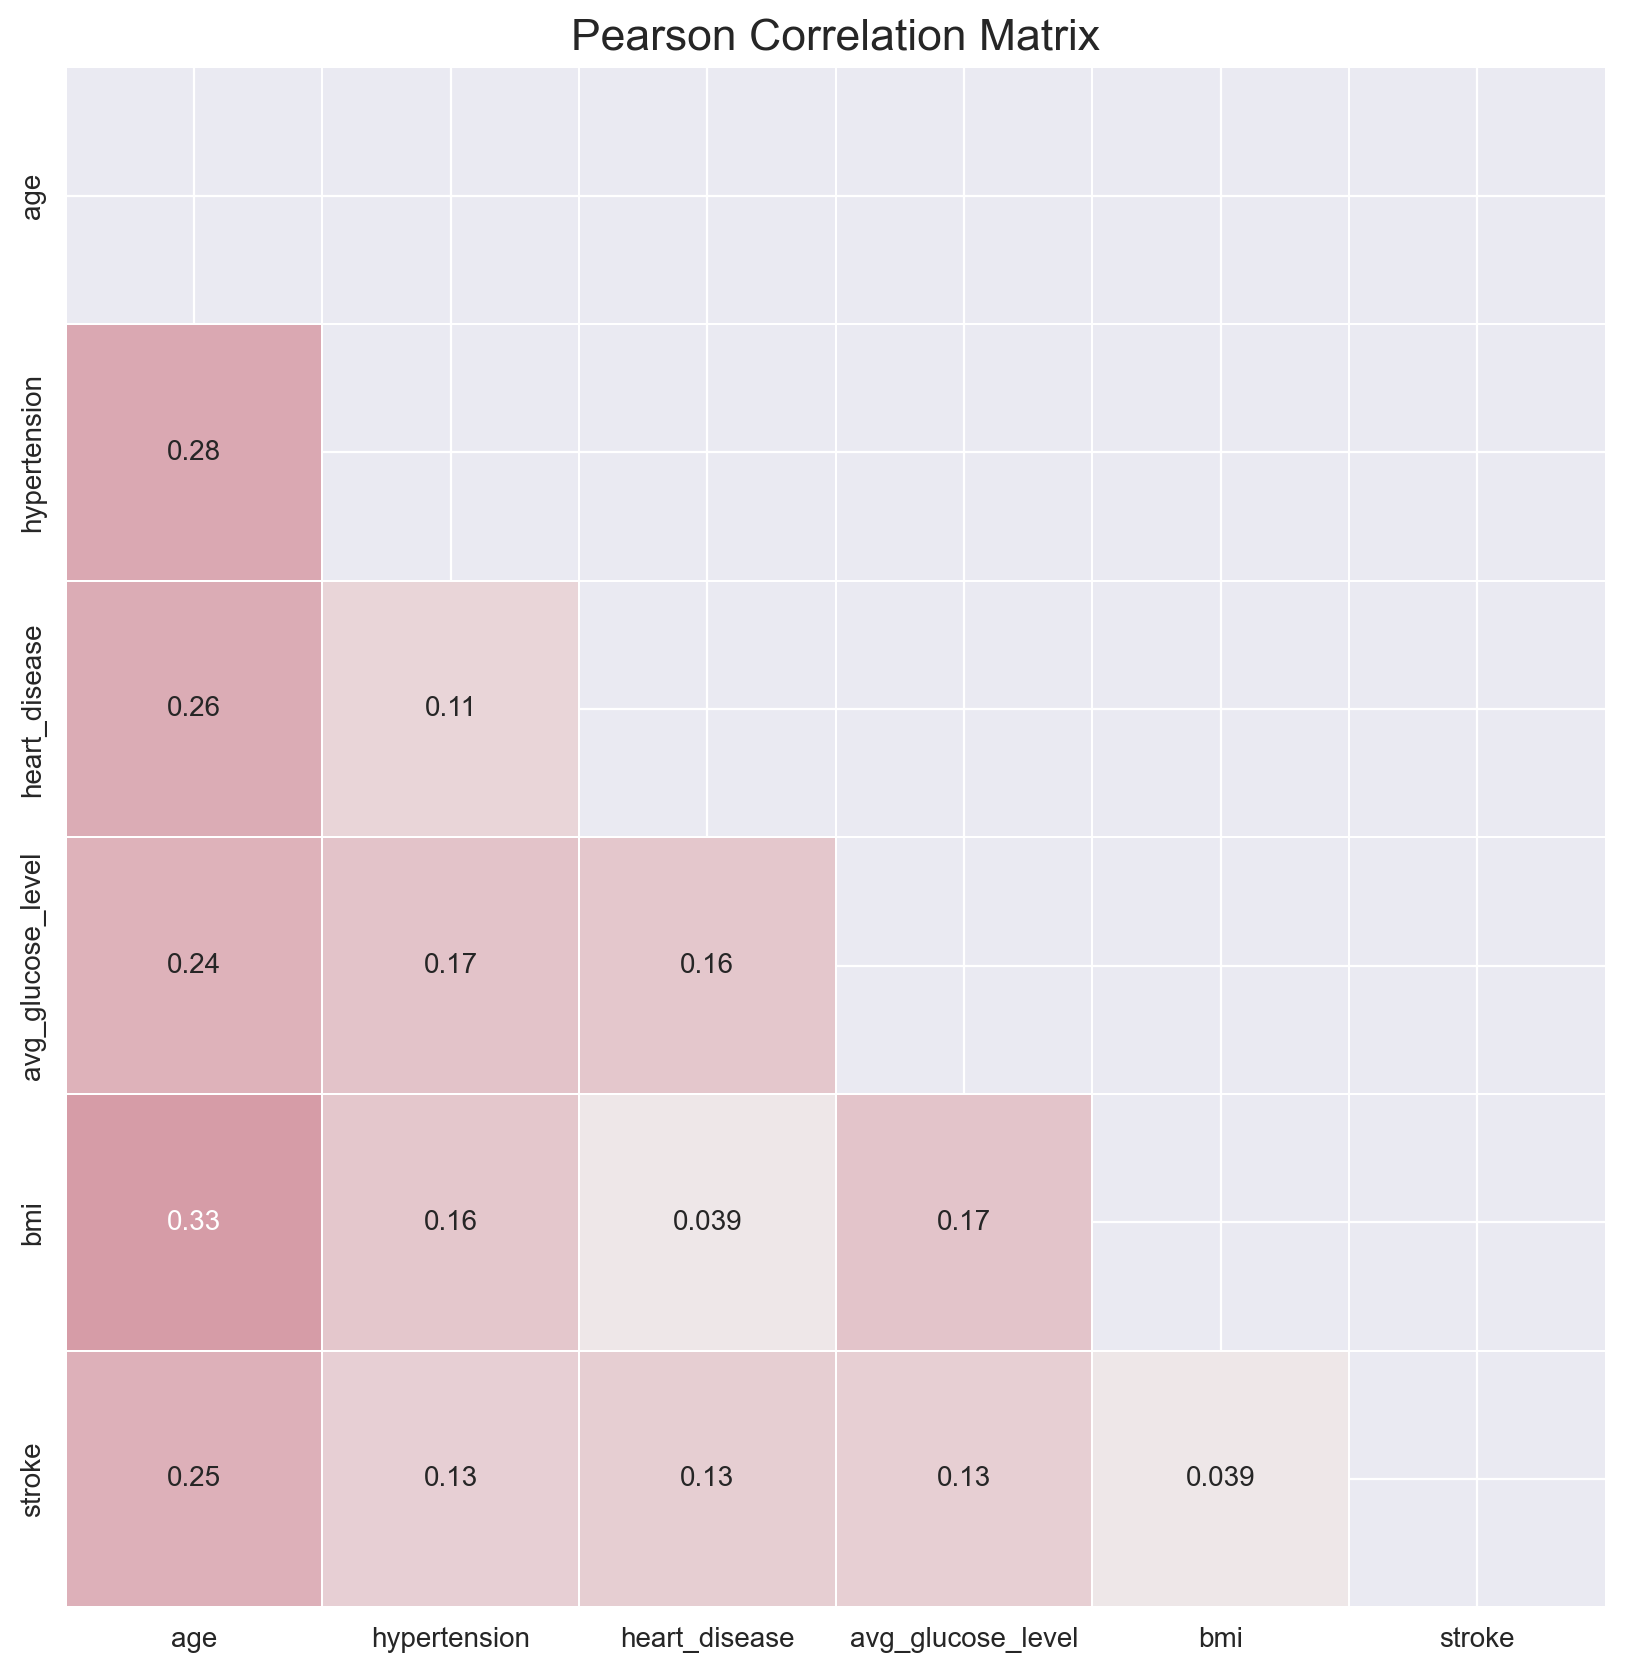

In [21]:
# from :
# https://www.kaggle.com/code/craigmthomas/play-s3e2-eda-models#1.6---Spearman-Correlation

# figure, axes
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 1, figsize=(10,10))
columns_of_interest = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','stroke']
# Spearman Correlation Matrix
correlation_matrix = df[columns_of_interest].corr(method='pearson')
sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.diverging_palette(290, 360, s=45, l=70, as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=False,
    ax=ax,
    annot=True,
)
ax.set_title('Pearson Correlation Matrix', fontsize=16)

plt.show()

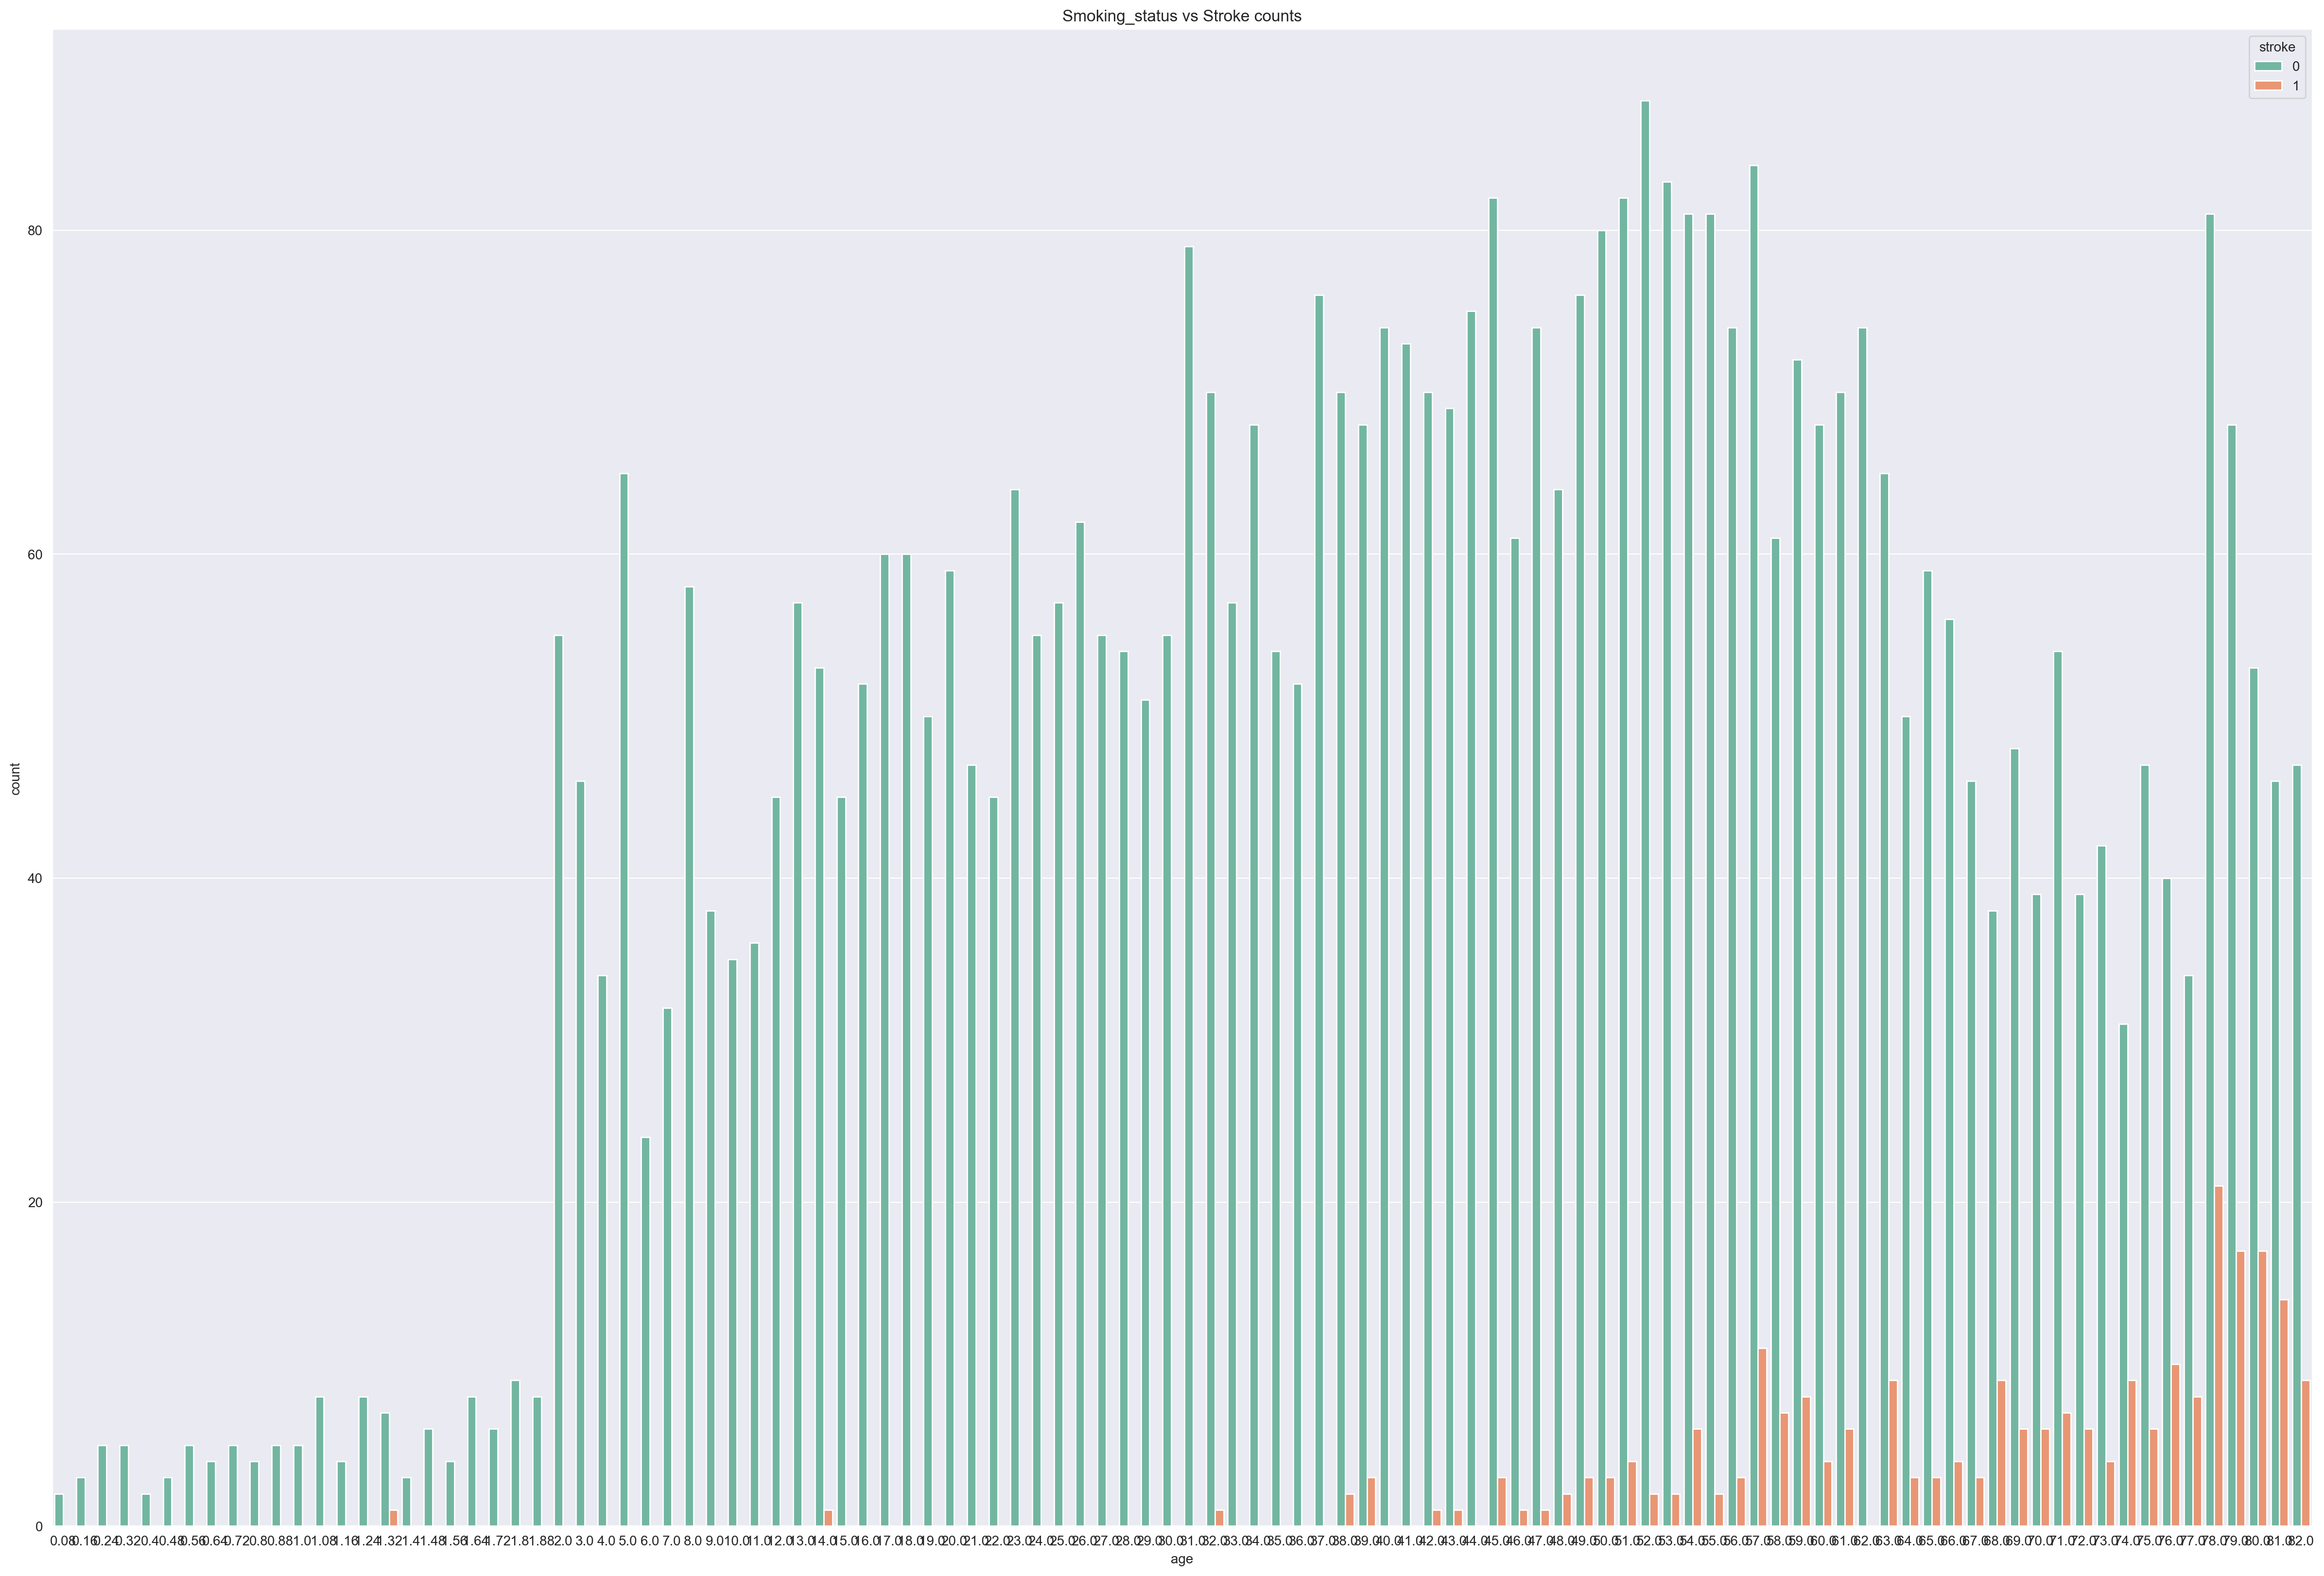

In [22]:
# How smoking_status feature effects the target variable
plt.figure(figsize=(30, 20))

sns.set_palette('Set2')

ax = sns.countplot(data = df, x='age', hue='stroke')
ax.set_title('Smoking_status vs Stroke counts')
plt.show()

In [23]:
df['age'] = df['age'].apply(lambda x: 0 if x < 50 else 1)

In [24]:
df.head()

id  gender  age  hypertension  heart_disease ever_married  \
0   9046    Male    1             0              1          Yes   
1  51676  Female    1             0              0          Yes   
2  31112    Male    1             0              1          Yes   
3  60182  Female    0             0              0          Yes   
4   1665  Female    1             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  28.893237   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1

In [25]:
df['smoking_status'] = df['smoking_status'].replace('Unknown', 'never smoked')

In [26]:
df['smoking_status'].value_counts()

smoking_status
never smoked       3436
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [27]:
df.head(3)

id  gender  age  hypertension  heart_disease ever_married  \
0   9046    Male    1             0              1          Yes   
1  51676  Female    1             0              0          Yes   
2  31112    Male    1             0              1          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  28.893237   
2        Private          Rural             105.92  32.500000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1

In [28]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354     0.432485      0.097456       0.054012   
std    21161.721625     0.495469      0.296607       0.226063   
min       67.000000     0.000000      0.000000       0.000000   
25%    17741.250000     0.000000      0.000000       0.000000   
50%    36932.000000     0.000000      0.000000       0.000000   
75%    54682.000000     1.000000      0.000000       0.000000   
max    72940.000000     1.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  5110.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.698018     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.800000     0.000000  
50%            91.885000    28.400000     0.000000  
75%           114.090000    32.800000     0.000000  
max           271.740000    97.600000     1.000000

In [29]:
df['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

In [30]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [31]:
df.duplicated().sum()

0

In [32]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [33]:
# Assuming df is your DataFrame
# Filter the DataFrame based on the condition related to strokes (replace 'condition' with your actual condition)
condition = df['stroke'] == 1
filtered_df = df[condition]

# Describe the filtered DataFrame
description = filtered_df.describe()
print(description)

                 id         age  hypertension  heart_disease  \
count    249.000000  249.000000    249.000000     249.000000   
mean   37115.068273    0.919679      0.265060       0.188755   
std    21993.344872    0.272337      0.442254       0.392102   
min      210.000000    0.000000      0.000000       0.000000   
25%    17013.000000    1.000000      0.000000       0.000000   
50%    36706.000000    1.000000      0.000000       0.000000   
75%    56669.000000    1.000000      1.000000       0.000000   
max    72918.000000    1.000000      1.000000       1.000000   

       avg_glucose_level         bmi  stroke  
count         249.000000  249.000000   249.0  
mean          132.544739   30.217789     1.0  
std            61.921056    5.825589     0.0  
min            56.110000   16.900000     1.0  
25%            79.790000   27.000000     1.0  
50%           105.220000   28.893237     1.0  
75%           196.710000   32.500000     1.0  
max           271.740000   56.600000     1.0  


In [34]:
# Assuming df is your DataFrame
# Filter the DataFrame based on the condition related to strokes (replace 'condition' with your actual condition)
condition = df['stroke'] == 0
filtered_df = df[condition]

# Describe the filtered DataFrame
description = filtered_df.describe()
print(description)


                 id          age  hypertension  heart_disease  \
count   4861.000000  4861.000000   4861.000000    4861.000000   
mean   36487.236371     0.407529      0.088871       0.047110   
std    21120.133386     0.491425      0.284586       0.211895   
min       67.000000     0.000000      0.000000       0.000000   
25%    17762.000000     0.000000      0.000000       0.000000   
50%    36958.000000     0.000000      0.000000       0.000000   
75%    54497.000000     1.000000      0.000000       0.000000   
max    72940.000000     1.000000      1.000000       1.000000   

       avg_glucose_level          bmi  stroke  
count        4861.000000  4861.000000  4861.0  
mean          104.795513    28.825388     0.0  
std            43.846069     7.776203     0.0  
min            55.120000    10.300000     0.0  
25%            77.120000    23.600000     0.0  
50%            91.470000    28.300000     0.0  
75%           112.830000    32.800000     0.0  
max           267.760000    97

In [35]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [36]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
#from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, cross_validate
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_predict

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression


from sklearn import metrics

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay,RocCurveDisplay

from sklearn.feature_selection import RFE

from sklearn.metrics import fbeta_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import average_precision_score

In [37]:
  # Creating Training, Testing, and Target variables
X = df.drop(columns=['id','stroke'])
y = df['stroke']

In [38]:
X.head(3)

gender  age  hypertension  heart_disease ever_married      work_type  \
0    Male    1             0              1          Yes        Private   
1  Female    1             0              0          Yes  Self-employed   
2    Male    1             0              1          Yes        Private   

  Residence_type  avg_glucose_level        bmi   smoking_status  
0          Urban             228.69  36.600000  formerly smoked  
1          Rural             202.21  28.893237     never smoked  
2          Rural             105.92  32.500000     never smoked

## Imbalanced Data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,
                                                    test_size=0.2, random_state=42)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4088, 10), (1022, 10), (4088,), (1022,))

In [41]:
from sklearn.preprocessing import MinMaxScaler
label_encoder = LabelEncoder()
std = StandardScaler()

In [42]:
X_train.head(5)

gender  age  hypertension  heart_disease ever_married      work_type  \
845   Female    0             0              0          Yes        Private   
3744    Male    0             0              0           No        Private   
4183  Female    1             0              0          Yes  Self-employed   
3409    Male    0             0              0          Yes        Private   
284     Male    0             0              0           No       Govt_job   

     Residence_type  avg_glucose_level   bmi smoking_status  
845           Urban              69.21  33.1   never smoked  
3744          Rural             122.25  21.0   never smoked  
4183          Rural             110.42  24.9   never smoked  
3409          Urban              65.41  24.8         smokes  
284           Urban              82.34  31.6   never smoked

In [43]:
columns =['gender','ever_married','work_type','Residence_type','smoking_status']

for col in columns : 
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [44]:
X_train.head(5)

gender  age  hypertension  heart_disease  ever_married  work_type  \
845        0    0             0              0             1          2   
3744       1    0             0              0             0          2   
4183       0    1             0              0             1          3   
3409       1    0             0              0             1          2   
284        1    0             0              0             0          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  
845                1              69.21  33.1               1  
3744               0             122.25  21.0               1  
4183               0             110.42  24.9               1  
3409               1              65.41  24.8               2  
284                1              82.34  31.6               1

In [45]:
columns2 = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']

for col in columns2 : 
    X_train[col] = std.fit_transform(X_train[col].values.reshape(-1, 1))
    X_test[col] = std.transform(X_test[col].values.reshape(-1, 1))

In [46]:
X_train.head()

gender       age  hypertension  heart_disease  ever_married  \
845  -0.840344 -0.876887     -0.327962      -0.239061       0.71699   
3744  1.187594 -0.876887     -0.327962      -0.239061      -1.39472   
4183 -0.840344  1.140398     -0.327962      -0.239061       0.71699   
3409  1.187594 -0.876887     -0.327962      -0.239061       0.71699   
284   1.187594 -0.876887     -0.327962      -0.239061      -1.39472   

      work_type  Residence_type  avg_glucose_level       bmi  smoking_status  
845   -0.161118        0.987843          -0.819973  0.538479        0.037625  
3744  -0.161118       -1.012307           0.352075 -1.020641        0.037625  
4183   0.756224       -1.012307           0.090662 -0.518114        0.037625  
3409  -0.161118        0.987843          -0.903944 -0.531000        1.785500  
284   -1.995803        0.987843          -0.529834  0.345200        0.037625

In [47]:
X_train.shape

(4088, 10)

In [48]:
y_train.shape

(4088,)

In [49]:
#import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

# Assuming X_train is your feature matrix and y_train is the target labels
# Combine X_train and y_train
#Xy_train = pd.concat([X_train, y_train], axis=1)

# Separate data based on the target labels
#Xy_stroke_0 = Xy_train[Xy_train['stroke'] == 0].drop('stroke', axis=1)
#Xy_stroke_1 = Xy_train[Xy_train['stroke'] == 1].drop('stroke', axis=1)

# Standardize the data
#scaler = StandardScaler()
#Xy_stroke_0_scaled = scaler.fit_transform(Xy_stroke_0)
#Xy_stroke_1_scaled = scaler.transform(Xy_stroke_1)

# Perform PCA
#pca = PCA()
#pca_result_stroke_0 = pca.fit_transform(Xy_stroke_0_scaled)
#pca_result_stroke_1 = pca.transform(Xy_stroke_1_scaled)

# Visualize PCA
#plt.figure(figsize=(8, 6))
#plt.scatter(pca_result_stroke_0[:, 0], pca_result_stroke_0[:, 1], color='green', label='No Stroke')
#plt.scatter(pca_result_stroke_1[:, 0], pca_result_stroke_1[:, 1], color='red', label='Stroke')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
#plt.title('PCA Visualization of Stroke Data')
#plt.legend()
#plt.grid(True)
#plt.show()


In [50]:
smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

In [51]:
under = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)

In [52]:
over = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)

In [53]:
print('Original      :', X_train.shape)
print('Undersampling :', X_train_under.shape)
print('Oversampling  :', X_train_over.shape)
print('SMOTE         :', X_train_smt.shape)

Original      : (4088, 10)
Undersampling : (398, 10)
Oversampling  : (7778, 10)
SMOTE         : (7778, 10)


In [54]:
from collections import Counter
print('Original      :', Counter(y_train))
print('Undersampling :', Counter(y_train_under))
print('Oversampling  :', Counter(y_train_over))
print('SMOTE         :', Counter(y_train_smt))

Original      : Counter({0: 3889, 1: 199})
Undersampling : Counter({0: 199, 1: 199})
Oversampling  : Counter({0: 3889, 1: 3889})
SMOTE         : Counter({0: 3889, 1: 3889})


In [55]:
LR = LogisticRegression()
RF = RandomForestClassifier()
XGB = XGBClassifier()
Light = LGBMClassifier()
CAT = CatBoostClassifier()
ADA = AdaBoostClassifier()


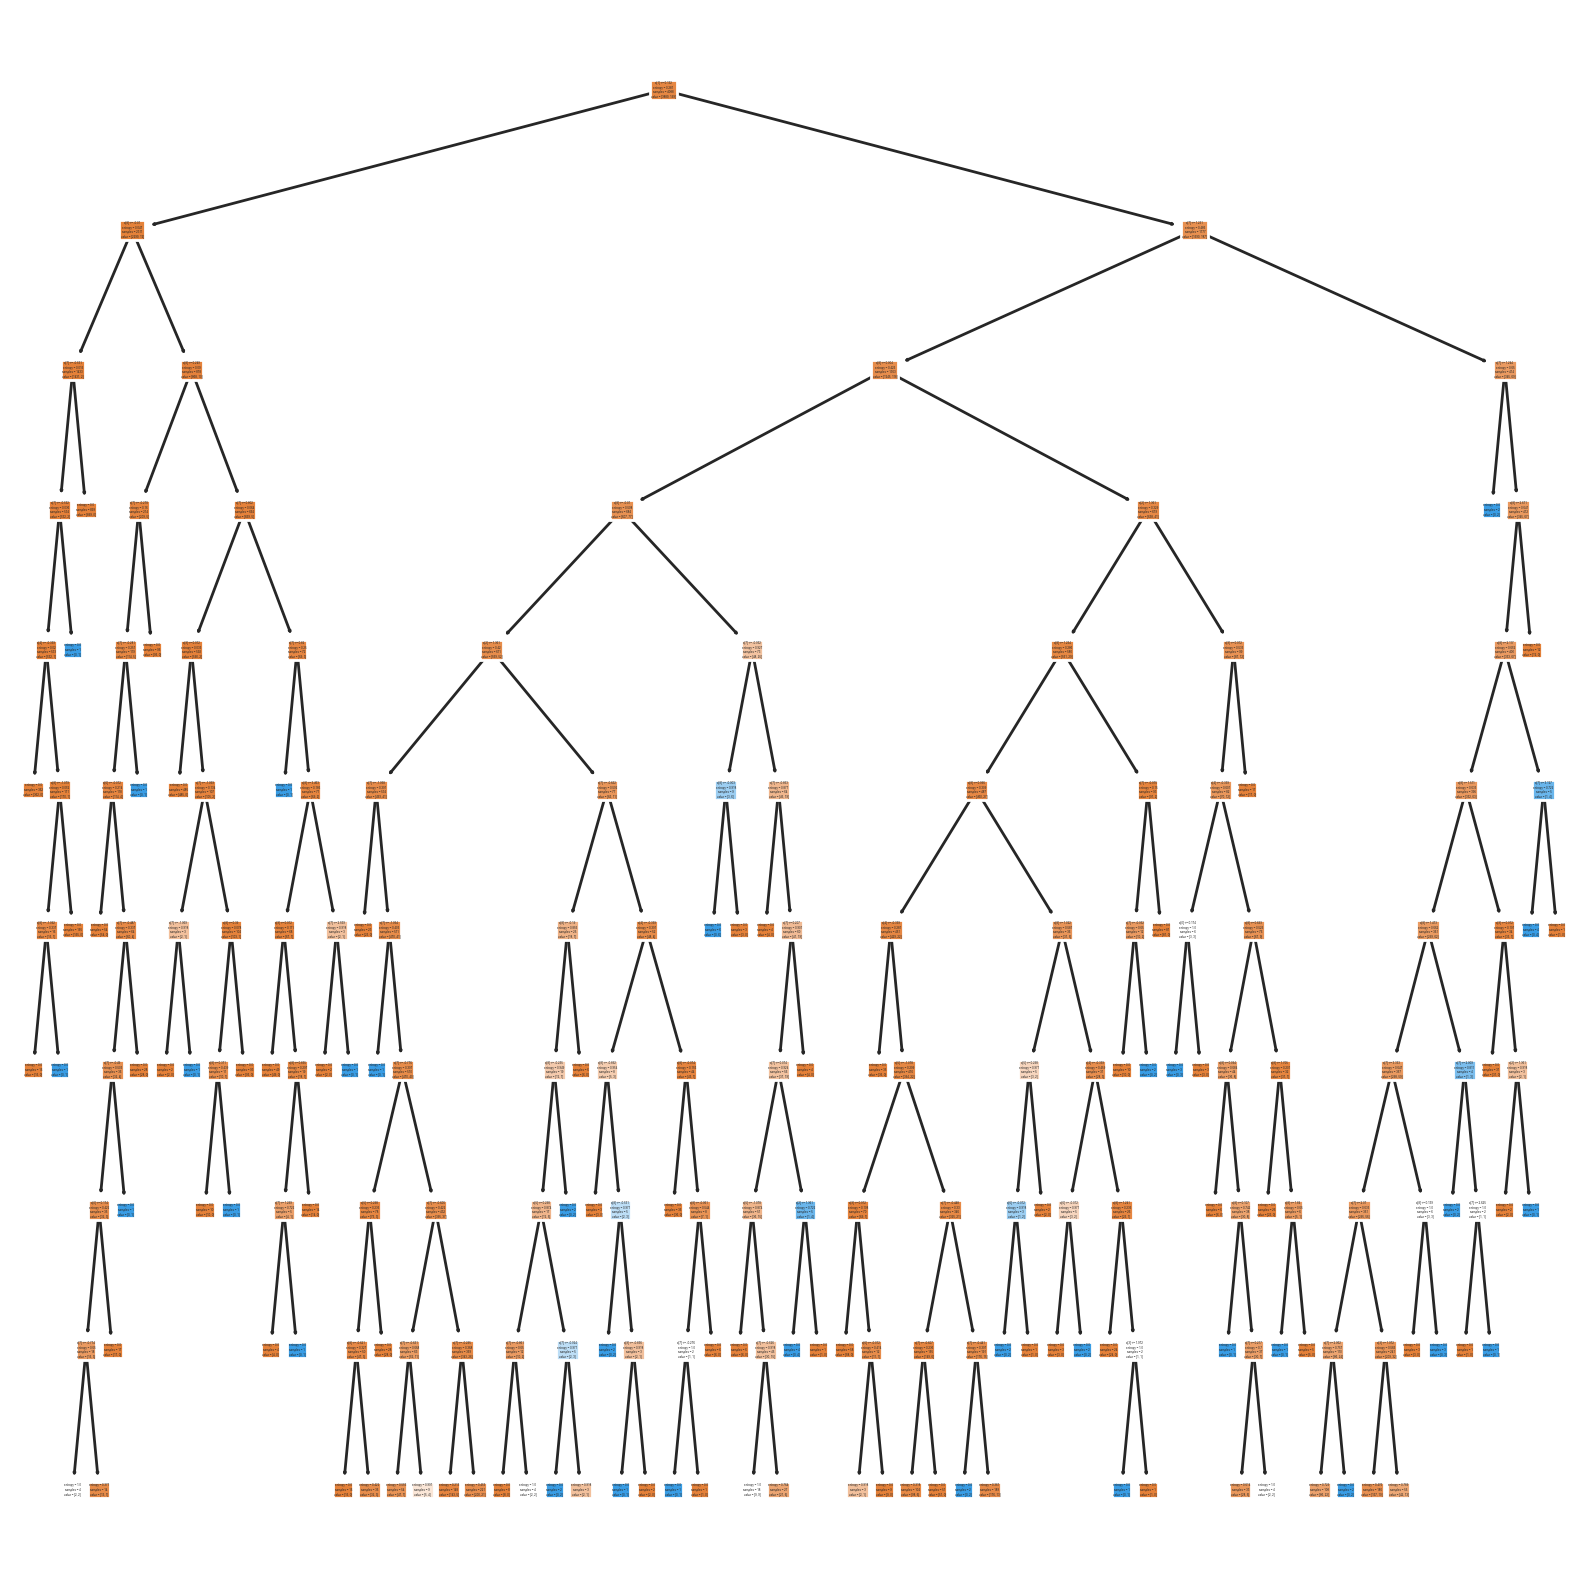

In [56]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10, criterion='entropy')
clf.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(clf, ax=ax, filled=True)
plt.show() 

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import numpy as np
from sklearn.utils.class_weight import compute_class_weight


# Define hyperparameter grids for each classifier
param_dist_LR = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000],
}

param_dist_RF = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_dist_XGB = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3, 5, 7]
}

param_dist_Light = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3, 5, 7]
}

param_dist_CAT = {
    "iterations": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1],
    "depth": [3, 5, 7]
}

param_dist_ADA = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

param_dist_DT = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define class weights
#class_weights = compute_class_weight(None, classes=np.unique(y_train), y=y_train)
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Create RandomizedSearchCV instances for each classifier with class weights
random_search_LR = RandomizedSearchCV(LogisticRegression(class_weight=class_weight_dict), param_distributions=param_dist_LR, n_iter=10, cv=5)
random_search_RF = RandomizedSearchCV(RandomForestClassifier(class_weight=class_weight_dict), param_distributions=param_dist_RF, n_iter=10, cv=5)
random_search_XGB = RandomizedSearchCV(XGBClassifier(scale_pos_weight=class_weight_dict[1]), param_distributions=param_dist_XGB, n_iter=10, cv=5)
random_search_Light = RandomizedSearchCV(LGBMClassifier(class_weight=class_weight_dict), param_distributions=param_dist_Light, n_iter=10, cv=5)
random_search_CAT = RandomizedSearchCV(CatBoostClassifier(scale_pos_weight=class_weight_dict[1]), param_distributions=param_dist_CAT, n_iter=10, cv=5)
random_search_ADA = RandomizedSearchCV(AdaBoostClassifier(), param_distributions=param_dist_ADA, n_iter=10, cv=5)
random_search_DT = RandomizedSearchCV(DecisionTreeClassifier(class_weight=class_weight_dict),param_distributions=param_dist_DT, n_iter=10,cv=5)




In [58]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [59]:
import shap

In [60]:
model = AdaBoostClassifier().fit(X_train, y_train)

In [61]:
model = XGBClassifier().fit(X_train, y_train)

In [62]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

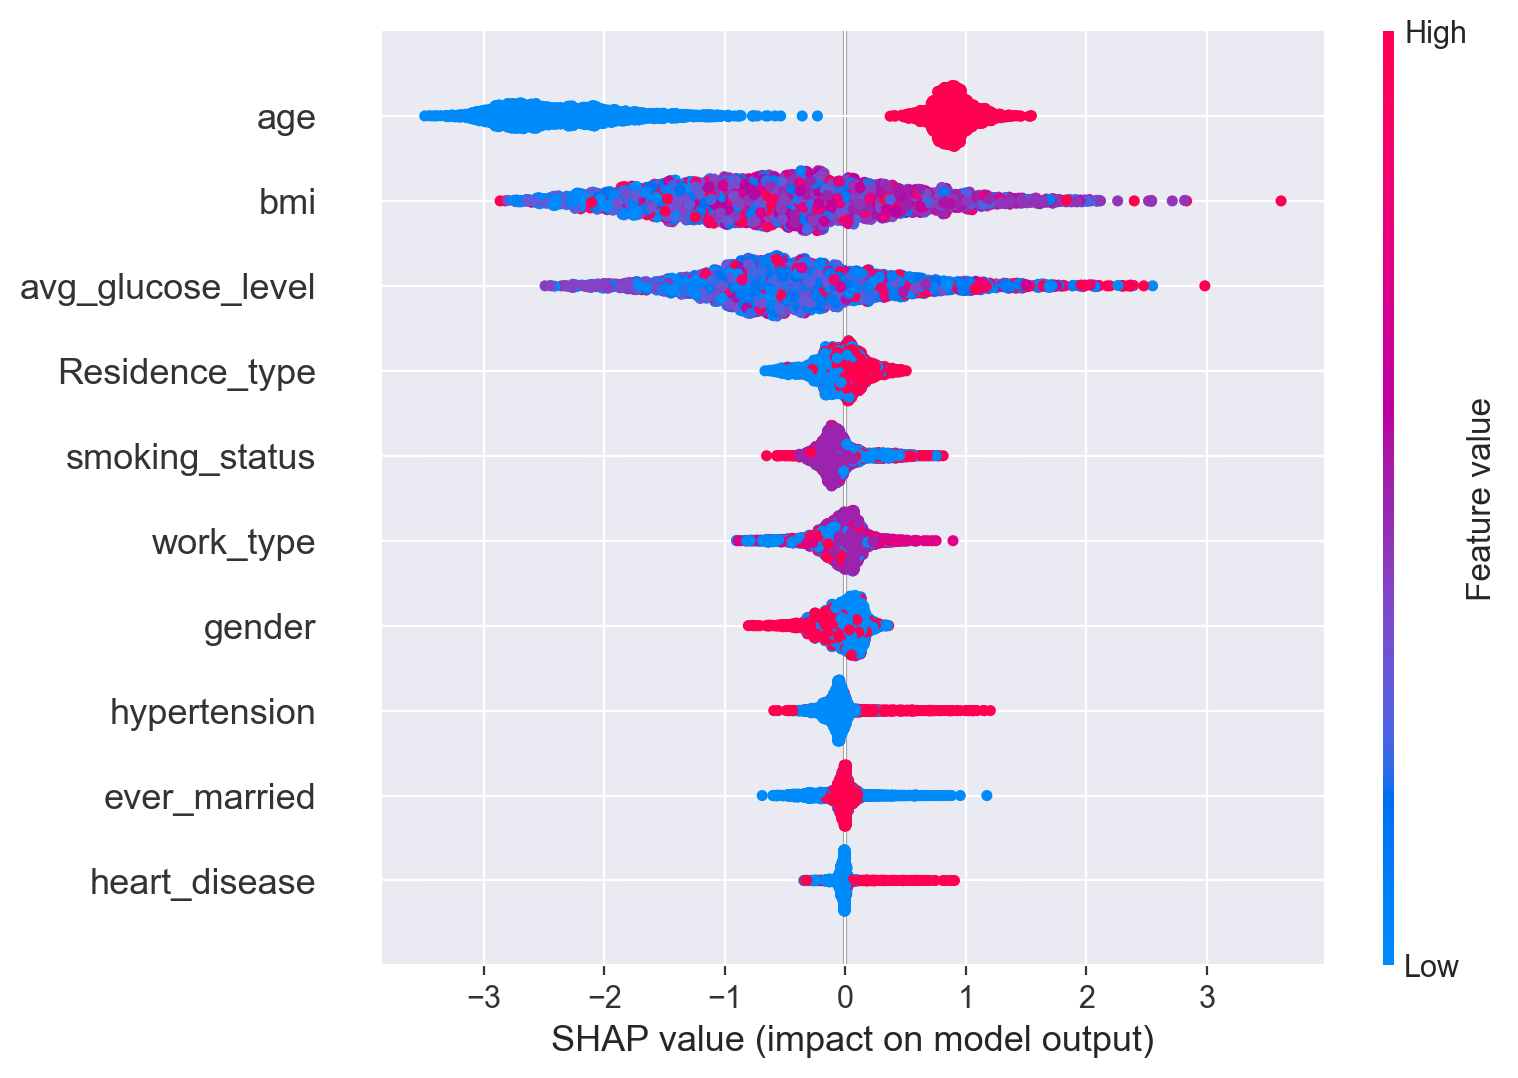

In [64]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)


In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [66]:
data_scenarios = [
    ("Original", X_train, y_train),
    ("SMOTE", X_train_smt, y_train_smt),
    ("Undersampling", X_train_under, y_train_under),
    ("Oversampling", X_train_over, y_train_over)
]

In [70]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penal

Classification Report for Original at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.97      0.32      0.48       972
           1       0.06      0.78      0.10        50

    accuracy                           0.35      1022
   macro avg       0.51      0.55      0.29      1022
weighted avg       0.92      0.35      0.47      1022

Accuracy for Original at Threshold 0.1: 0.35
Recall for Original at Threshold 0.1: 0.78
ROC AUC Score for Original at Threshold 0.1: 0.62
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.551522633744856
Classification Report for Original at Threshold 0.2:
              precision    recall  f1-score   support

           0       0.98      0.46      0.63       972
           1       0.07      0.78      0.13        50

    accuracy                           0.48      1022
   macro avg       0.52      0.62      0.38      1022
weighted avg       0.93      0.48      0.60      1022

Accuracy for O

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Settin

Classification Report for Original at Threshold 0.4:
              precision    recall  f1-score   support

           0       0.97      0.58      0.73       972
           1       0.07      0.60      0.12        50

    accuracy                           0.59      1022
   macro avg       0.52      0.59      0.43      1022
weighted avg       0.92      0.59      0.70      1022

Accuracy for Original at Threshold 0.4: 0.59
Recall for Original at Threshold 0.4: 0.60
ROC AUC Score for Original at Threshold 0.4: 0.63
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5921810699588477
Classification Report for Original at Threshold 0.5:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81       972
           1       0.09      0.60      0.16        50

    accuracy                           0.70      1022
   macro avg       0.53      0.65      0.49      1022
weighted avg       0.93      0.70      0.78      1022

Accuracy for 

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn

Classification Report for SMOTE at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.98      0.29      0.44       972
           1       0.06      0.86      0.11        50

    accuracy                           0.31      1022
   macro avg       0.52      0.57      0.28      1022
weighted avg       0.93      0.31      0.43      1022

Accuracy for SMOTE at Threshold 0.1: 0.31
Recall for SMOTE at Threshold 0.1: 0.86
ROC AUC Score for SMOTE at Threshold 0.1: 0.68
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5730041152263374
Classification Report for SMOTE at Threshold 0.2:
              precision    recall  f1-score   support

           0       0.97      0.45      0.61       972
           1       0.06      0.74      0.12        50

    accuracy                           0.46      1022
   macro avg       0.52      0.59      0.37      1022
weighted avg       0.93      0.46      0.59      1022

Accuracy for SMOTE at Thresh

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn

Classification Report for SMOTE at Threshold 0.4:
              precision    recall  f1-score   support

           0       0.98      0.63      0.76       972
           1       0.09      0.70      0.16        50

    accuracy                           0.63      1022
   macro avg       0.53      0.66      0.46      1022
weighted avg       0.93      0.63      0.73      1022

Accuracy for SMOTE at Threshold 0.4: 0.63
Recall for SMOTE at Threshold 0.4: 0.70
ROC AUC Score for SMOTE at Threshold 0.4: 0.71
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.6643004115226337
Classification Report for SMOTE at Threshold 0.5:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81       972
           1       0.09      0.58      0.15        50

    accuracy                           0.69      1022
   macro avg       0.53      0.64      0.48      1022
weighted avg       0.93      0.69      0.78      1022

Accuracy for SMOTE at Thresh

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn

Classification Report for Undersampling at Threshold 0.1:
              precision    recall  f1-score   support

           0       1.00      0.02      0.04       972
           1       0.05      1.00      0.09        50

    accuracy                           0.07      1022
   macro avg       0.52      0.51      0.07      1022
weighted avg       0.95      0.07      0.04      1022

Accuracy for Undersampling at Threshold 0.1: 0.07
Recall for Undersampling at Threshold 0.1: 1.00
ROC AUC Score for Undersampling at Threshold 0.1: 0.73
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5097736625514403
Classification Report for Undersampling at Threshold 0.2:
              precision    recall  f1-score   support

           0       0.98      0.31      0.47       972
           1       0.06      0.86      0.11        50

    accuracy                           0.33      1022
   macro avg       0.52      0.58      0.29      1022
weighted avg       0.93      0.33      0.45

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/linear

Classification Report for Oversampling at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.95      0.02      0.04       972
           1       0.05      0.98      0.09        50

    accuracy                           0.07      1022
   macro avg       0.50      0.50      0.06      1022
weighted avg       0.90      0.07      0.04      1022

Accuracy for Oversampling at Threshold 0.1: 0.07
Recall for Oversampling at Threshold 0.1: 0.98
ROC AUC Score for Oversampling at Threshold 0.1: 0.74
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.49925925925925924
Classification Report for Oversampling at Threshold 0.2:
              precision    recall  f1-score   support

           0       0.98      0.32      0.48       972
           1       0.06      0.86      0.11        50

    accuracy                           0.34      1022
   macro avg       0.52      0.59      0.30      1022
weighted avg       0.93      0.34      0.46    

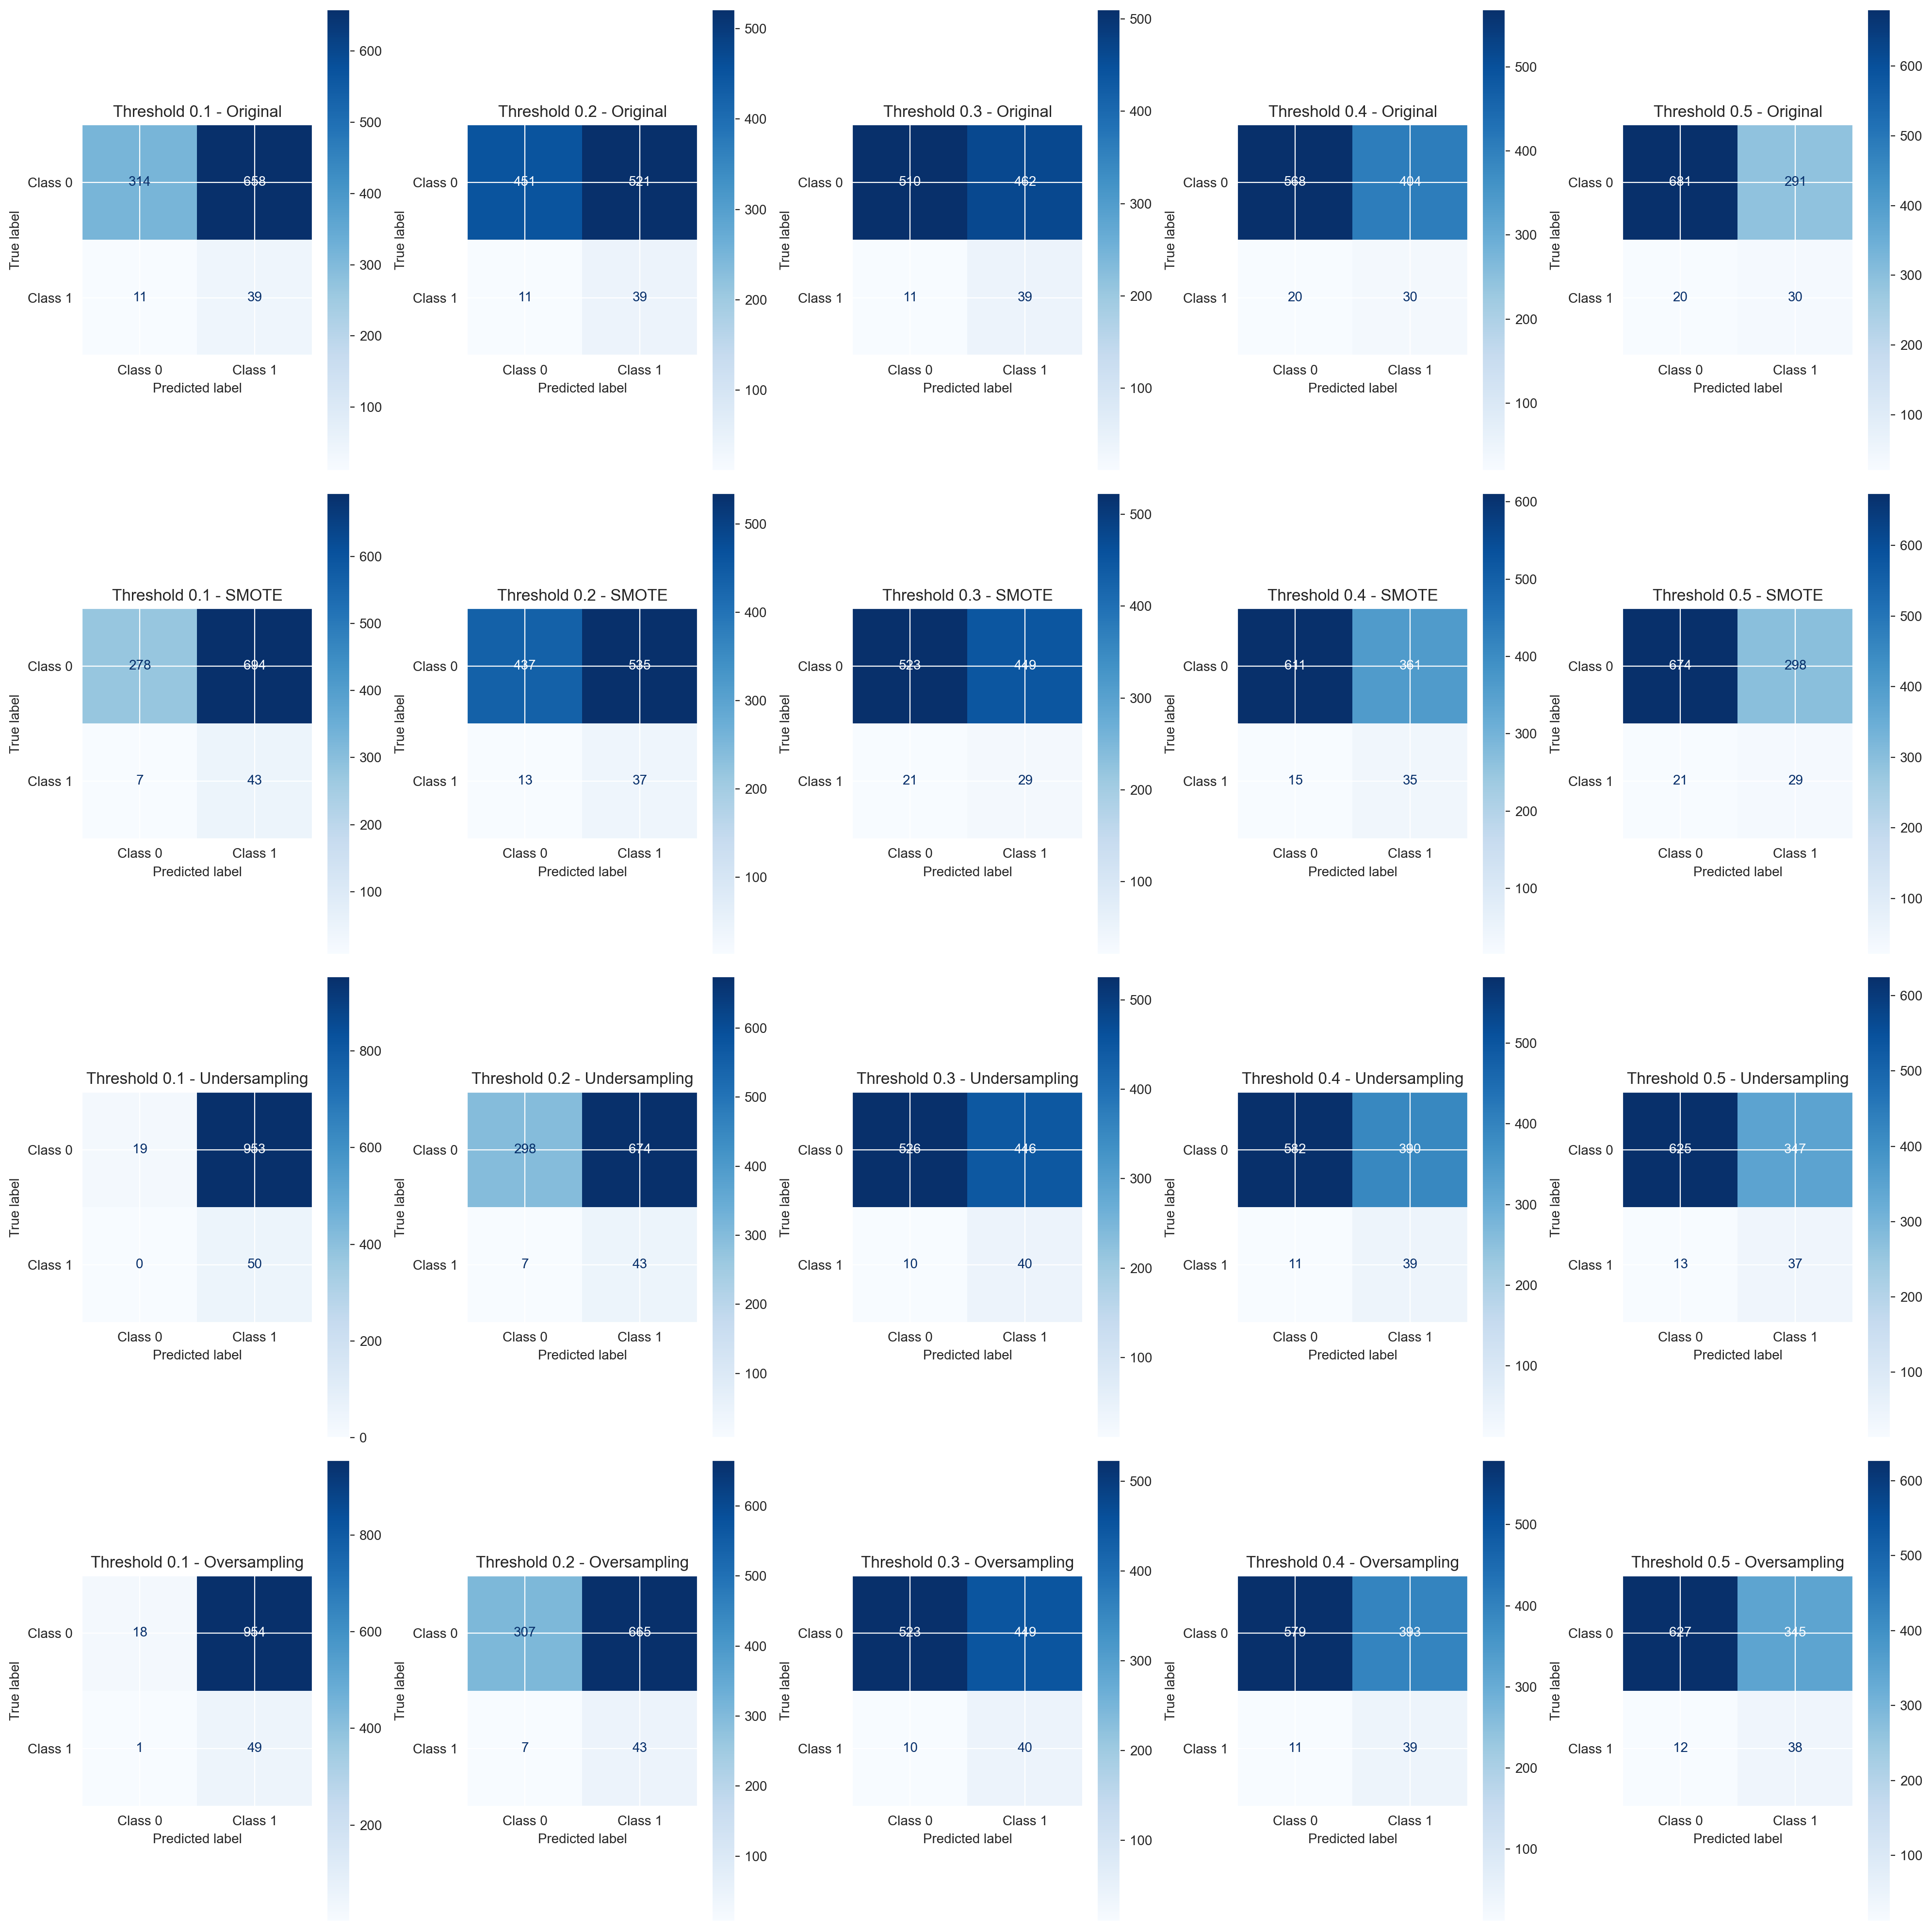

CPU times: user 20.9 s, sys: 5.28 s, total: 26.2 s
Wall time: 9.74 s


In [76]:
%%time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import fbeta_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Define the threshold values
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]

# Create a figure with subplots for performance metrics
fig, axes = plt.subplots(len(data_scenarios), len(thresholds), figsize=(20, 5 * len(data_scenarios)))

# Iterate through the scenarios
for i, (scenario_name, X_train_scenario, y_train_scenario) in enumerate(data_scenarios):
    # Train the Logistic Regression model with GridSearchCV
    random_search_LR.fit(X_train_scenario, y_train_scenario)
    best_LR_model = random_search_LR.best_estimator_

    cv = StratifiedKFold(n_splits=10, shuffle=True)
    
    # Iterate through threshold values
    for j, threshold in enumerate(thresholds):
        y_pred_prob_cv = cross_val_predict(best_LR_model, X_test, y_test, cv=cv, method='predict_proba', n_jobs=-1)
        
        # Make predictions with probability scores based on the current threshold
        pred_prob = (y_pred_prob_cv[:, 1] > threshold).astype('int')

        # Compute the confusion matrix
        cm = confusion_matrix(y_test, pred_prob)
        
        # Create a ConfusionMatrixDisplay and plot it on the corresponding subplot
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
        disp.plot(cmap=plt.cm.Blues, values_format='d', ax=axes[i, j])
        
        # Add labels and title to the subplot
        axes[i, j].set_title(f'Threshold {threshold} - {scenario_name}')
        
        # Calculate and print the classification report
        class_report = classification_report(y_test, pred_prob)
        print(f'Classification Report for {scenario_name} at Threshold {threshold}:\n{class_report}')

        acc = accuracy_score(y_test, pred_prob)
        recall = recall_score(y_test, pred_prob)
        f1 = f1_score(y_test, pred_prob)
        print(f'Accuracy for {scenario_name} at Threshold {threshold}: {acc:.2f}')
        print(f'Recall for {scenario_name} at Threshold {threshold}: {recall:.2f}')
        print(f'ROC AUC Score for {scenario_name} at Threshold {threshold}: {roc_auc_score(y_test, y_pred_prob_cv[:, 1]):.2f}')
        print("Balanced Accuracy Score for {scenario_name} at Threshold {threshold}:", balanced_accuracy_score(y_test, pred_prob))

# Adjust the layout to prevent overlapping titles
plt.tight_layout()
plt.show()


In [72]:
# from sklearn.decomposition import PCA

# # Assuming you have PCA-transformed data stored in pca_results

# # Plot PCA scatter with FP and FN as red dots, and TP and TN as green dots
# plt.figure(figsize=(8, 6))

# # Define colors for different classes
# colors = np.array(['green', 'red'])

# # Plot PCA scatter
# plt.scatter(pca_results[:, 0], pca_results[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

# # Highlight false positives (FP) and false negatives (FN)
# fp_indices = np.where((y_test == 0) & (pred_prob == 1))[0]
# fn_indices = np.where((y_test == 1) & (pred_prob == 0))[0]
# plt.scatter(pca_results[fp_indices, 0], pca_results[fp_indices, 1], c='red', marker='x', label='False Positives')
# plt.scatter(pca_results[fn_indices, 0], pca_results[fn_indices, 1], c='red', marker='o', label='False Negatives')

# # Highlight true positives (TP) and true negatives (TN)
# tp_indices = np.where((y_test == 1) & (pred_prob == 1))[0]
# tn_indices = np.where((y_test == 0) & (pred_prob == 0))[0]
# plt.scatter(pca_results[tp_indices, 0], pca_results[tp_indices, 1], c='green', marker='o', label='True Positives')
# plt.scatter(pca_results[tn_indices, 0], pca_results[tn_indices, 1], c='green', marker='x', label='True Negatives')

# # Annotate FP, FN, TP, TN counts
# plt.text(plt.xlim()[1], plt.ylim()[0], f'FP: {len(fp_indices)}', verticalalignment='bottom', horizontalalignment='right', color='red')
# plt.text(plt.xlim()[1], plt.ylim()[1], f'FN: {len(fn_indices)}', verticalalignment='top', horizontalalignment='right', color='red')
# plt.text(plt.xlim()[0], plt.ylim()[0], f'TP: {len(tp_indices)}', verticalalignment='bottom', horizontalalignment='left', color='green')
# plt.text(plt.xlim()[0], plt.ylim()[1], f'TN: {len(tn_indices)}', verticalalignment='top', horizontalalignment='left', color='green')

# plt.title('PCA Plot with Prediction Outcomes')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()
# plt.grid(True)
# plt.show()


Classification Report for Original at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       972
           1       0.06      0.06      0.06        50

    accuracy                           0.91      1022
   macro avg       0.51      0.51      0.51      1022
weighted avg       0.91      0.91      0.91      1022

ROC AUC Score for Original at Threshold 0.1: 0.51
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5073662551440329
Classification Report for Original at Threshold 0.2:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       972
           1       0.04      0.04      0.04        50

    accuracy                           0.91      1022
   macro avg       0.50      0.50      0.50      1022
weighted avg       0.91      0.91      0.91      1022

ROC AUC Score for Original at Threshold 0.2: 0.50
Balanced Accuracy Score for {scenario_name} at Thre

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for SMOTE at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.17      0.16      0.16        50

    accuracy                           0.92      1022
   macro avg       0.56      0.56      0.56      1022
weighted avg       0.92      0.92      0.92      1022

ROC AUC Score for SMOTE at Threshold 0.1: 0.56
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5599382716049383
Classification Report for SMOTE at Threshold 0.2:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       972
           1       0.06      0.06      0.06        50

    accuracy                           0.91      1022
   macro avg       0.51      0.51      0.51      1022
weighted avg       0.91      0.91      0.91      1022

ROC AUC Score for SMOTE at Threshold 0.2: 0.51
Balanced Accuracy Score for {scenario_name} at Threshold {thres

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for SMOTE at Threshold 1.0:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for SMOTE at Threshold 1.0: 0.52
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5
Classification Report for Undersampling at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       972
           1       0.10      0.26      0.14        50

    accuracy                           0.85      1022
   macro avg       0.53      0.57      0.53      1022
weighted avg       0.92      0.85      0.88      1022

ROC AUC Score for Undersampling at Threshold 0.1: 0.57
Balanced Accuracy Score for {scenario_name} at Threshold {thre

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Oversampling at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       972
           1       0.13      0.26      0.17        50

    accuracy                           0.88      1022
   macro avg       0.54      0.58      0.55      1022
weighted avg       0.92      0.88      0.90      1022

ROC AUC Score for Oversampling at Threshold 0.1: 0.59
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5847325102880658
Classification Report for Oversampling at Threshold 0.2:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       972
           1       0.09      0.20      0.13        50

    accuracy                           0.86      1022
   macro avg       0.52      0.55      0.53      1022
weighted avg       0.91      0.86      0.89      1022

ROC AUC Score for Oversampling at Threshold 0.2: 0.55
Balanced Accuracy Score for {scenar

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

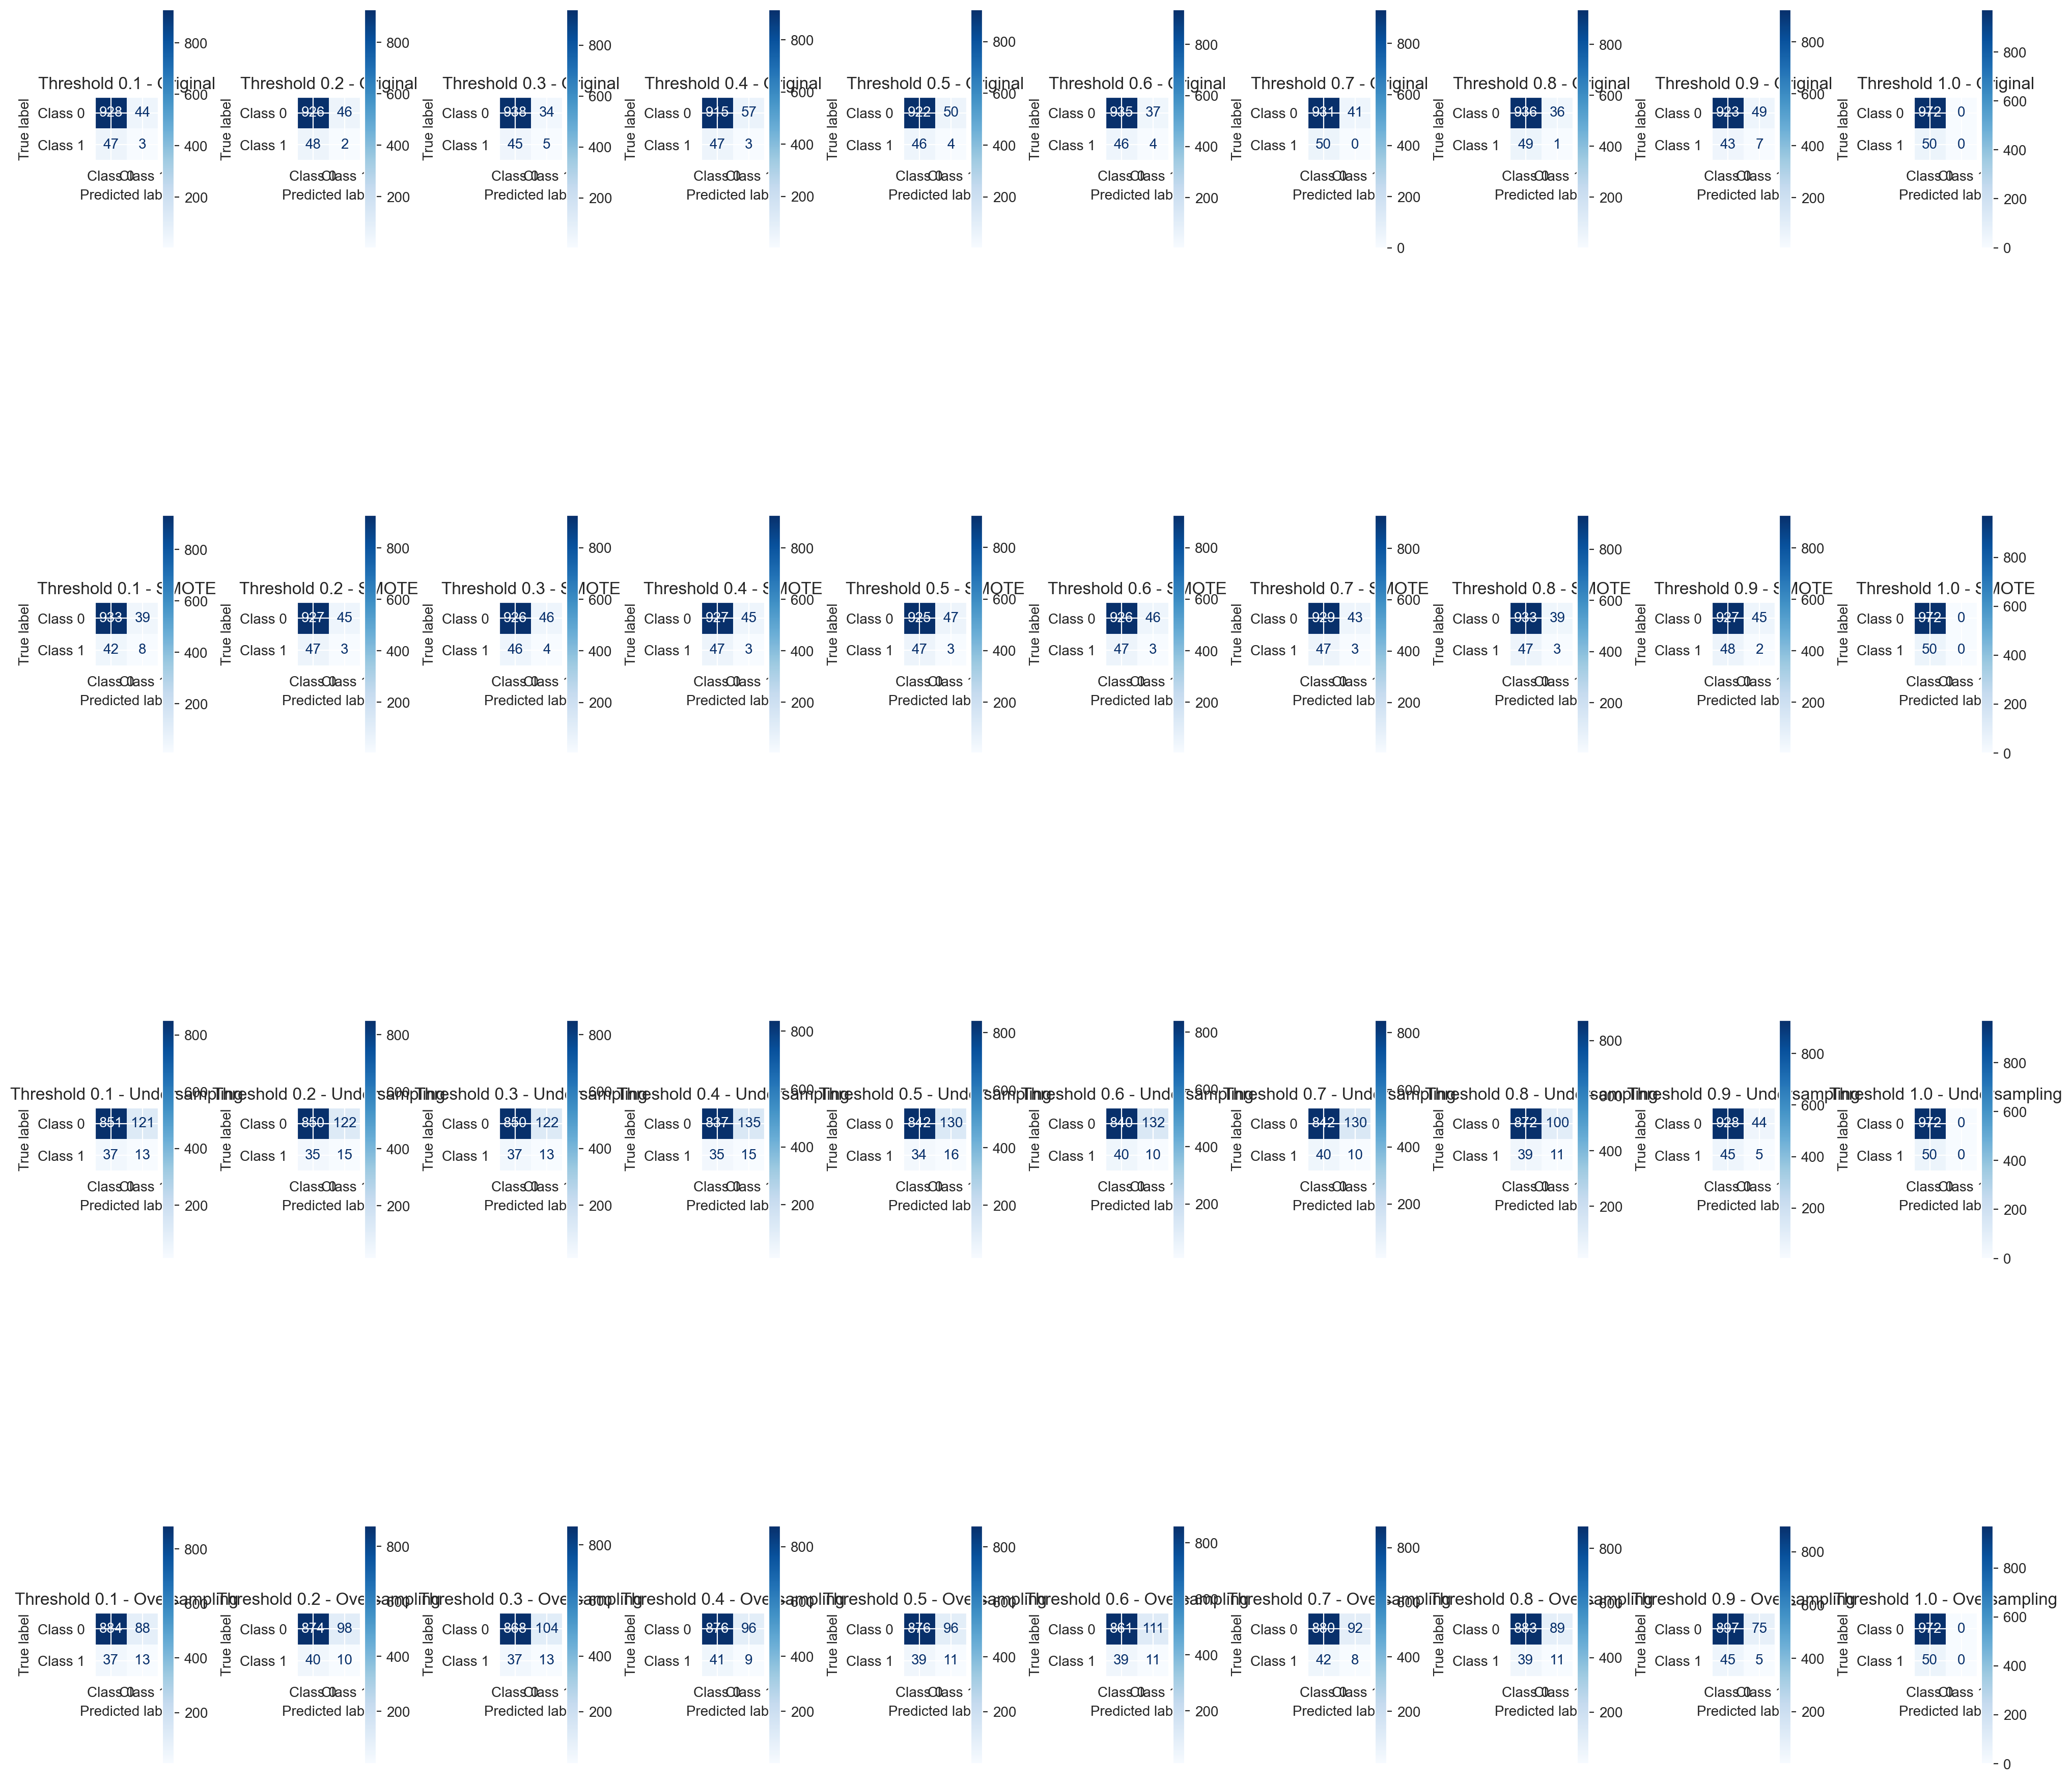

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import fbeta_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Define the threshold values
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create a figure with subplots for performance metrics
fig, axes = plt.subplots(len(data_scenarios), len(thresholds), figsize=(20, 5 * len(data_scenarios)))

# Iterate through the scenarios
for i, (scenario_name, X_train_scenario, y_train_scenario) in enumerate(data_scenarios):
    # Train the Logistic Regression model with GridSearchCV
    random_search_DT.fit(X_train_scenario, y_train_scenario)
    best_DT_model = random_search_DT.best_estimator_

    cv = StratifiedKFold(n_splits=10, shuffle=True)
    
    # Iterate through threshold values
    for j, threshold in enumerate(thresholds):
        y_pred_prob_cv = cross_val_predict(best_DT_model, X_test, y_test, cv=cv, method='predict_proba', n_jobs=-1)
        
        # Make predictions with probability scores based on the current threshold
        pred_prob = (y_pred_prob_cv[:, 1] > threshold).astype('int')

        # Compute the confusion matrix
        cm = confusion_matrix(y_test, pred_prob)
        
        # Create a ConfusionMatrixDisplay and plot it on the corresponding subplot
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
        disp.plot(cmap=plt.cm.Blues, values_format='d', ax=axes[i, j])
        
        # Add labels and title to the subplot
        axes[i, j].set_title(f'Threshold {threshold} - {scenario_name}')
        
        # Calculate and print the classification report
        class_report = classification_report(y_test, pred_prob)
        print(f'Classification Report for {scenario_name} at Threshold {threshold}:\n{class_report}')



        print(f'ROC AUC Score for {scenario_name} at Threshold {threshold}: {roc_auc_score(y_test, y_pred_prob_cv[:, 1]):.2f}')
        print("Balanced Accuracy Score for {scenario_name} at Threshold {threshold}:", balanced_accuracy_score(y_test, pred_prob))

# Adjust the layout to prevent overlapping titles
plt.tight_layout()
plt.show()


Classification Report for Original at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       972
           1       0.11      0.34      0.17        50

    accuracy                           0.83      1022
   macro avg       0.54      0.60      0.54      1022
weighted avg       0.92      0.83      0.87      1022

ROC AUC Score for Original at Threshold 0.1: 0.70
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5995267489711934
Classification Report for Original at Threshold 0.2:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       972
           1       0.12      0.14      0.13        50

    accuracy                           0.91      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.91      0.91      0.91      1022

ROC AUC Score for Original at Threshold 0.2: 0.69
Balanced Accuracy Score for {scenario_name} at Thre

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Original at Threshold 0.7:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Original at Threshold 0.7: 0.69
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Original at Threshold 0.8:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Original at Threshold 0.8: 0.71
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Original at Threshold 0.9:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Original at Threshold 0.9: 0.67
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Original at Threshold 1.0:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Original at Threshold 1.0: 0.69
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5
Classification Report for SMOTE at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       972
           1       0.12      0.36      0.18        50

    accuracy                           0.84      1022
   macro avg       0.54      0.61      0.55      1022
weighted avg       0.92      0.84      0.88      1022

ROC AUC Score for SMOTE at Threshold 0.1: 0.70
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for SMOTE at Threshold 0.7:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for SMOTE at Threshold 0.7: 0.69
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for SMOTE at Threshold 0.8:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for SMOTE at Threshold 0.8: 0.73
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for SMOTE at Threshold 0.9:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for SMOTE at Threshold 0.9: 0.69
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for SMOTE at Threshold 1.0:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for SMOTE at Threshold 1.0: 0.69
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5
Classification Report for Undersampling at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82       972
           1       0.09      0.58      0.16        50

    accuracy                           0.70      1022
   macro avg       0.53      0.64      0.49      1022
weighted avg       0.93      0.70      0.79      1022

ROC AUC Score for Undersampling at Threshold 0.1: 0.70
Balanced Accuracy Score for {scenario_name} at Threshold {thre

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Undersampling at Threshold 0.7:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Undersampling at Threshold 0.7: 0.74
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Undersampling at Threshold 0.8:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Undersampling at Threshold 0.8: 0.69
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Undersampling at Threshold 0.9:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Undersampling at Threshold 0.9: 0.73
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Undersampling at Threshold 1.0:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Undersampling at Threshold 1.0: 0.70
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5
Classification Report for Oversampling at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84       972
           1       0.10      0.56      0.17        50

    accuracy                           0.73      1022
   macro avg       0.53      0.65      0.50      1022
weighted avg       0.93      0.73      0.80      1022

ROC AUC Score for Oversampling at Threshold 0.1: 0.71
Balanced Accuracy Score for {scenario_name} at T

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Oversampling at Threshold 0.8:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Oversampling at Threshold 0.8: 0.70
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Oversampling at Threshold 0.9:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Oversampling at Threshold 0.9: 0.70
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Oversampling at Threshold 1.0:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Oversampling at Threshold 1.0: 0.70
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


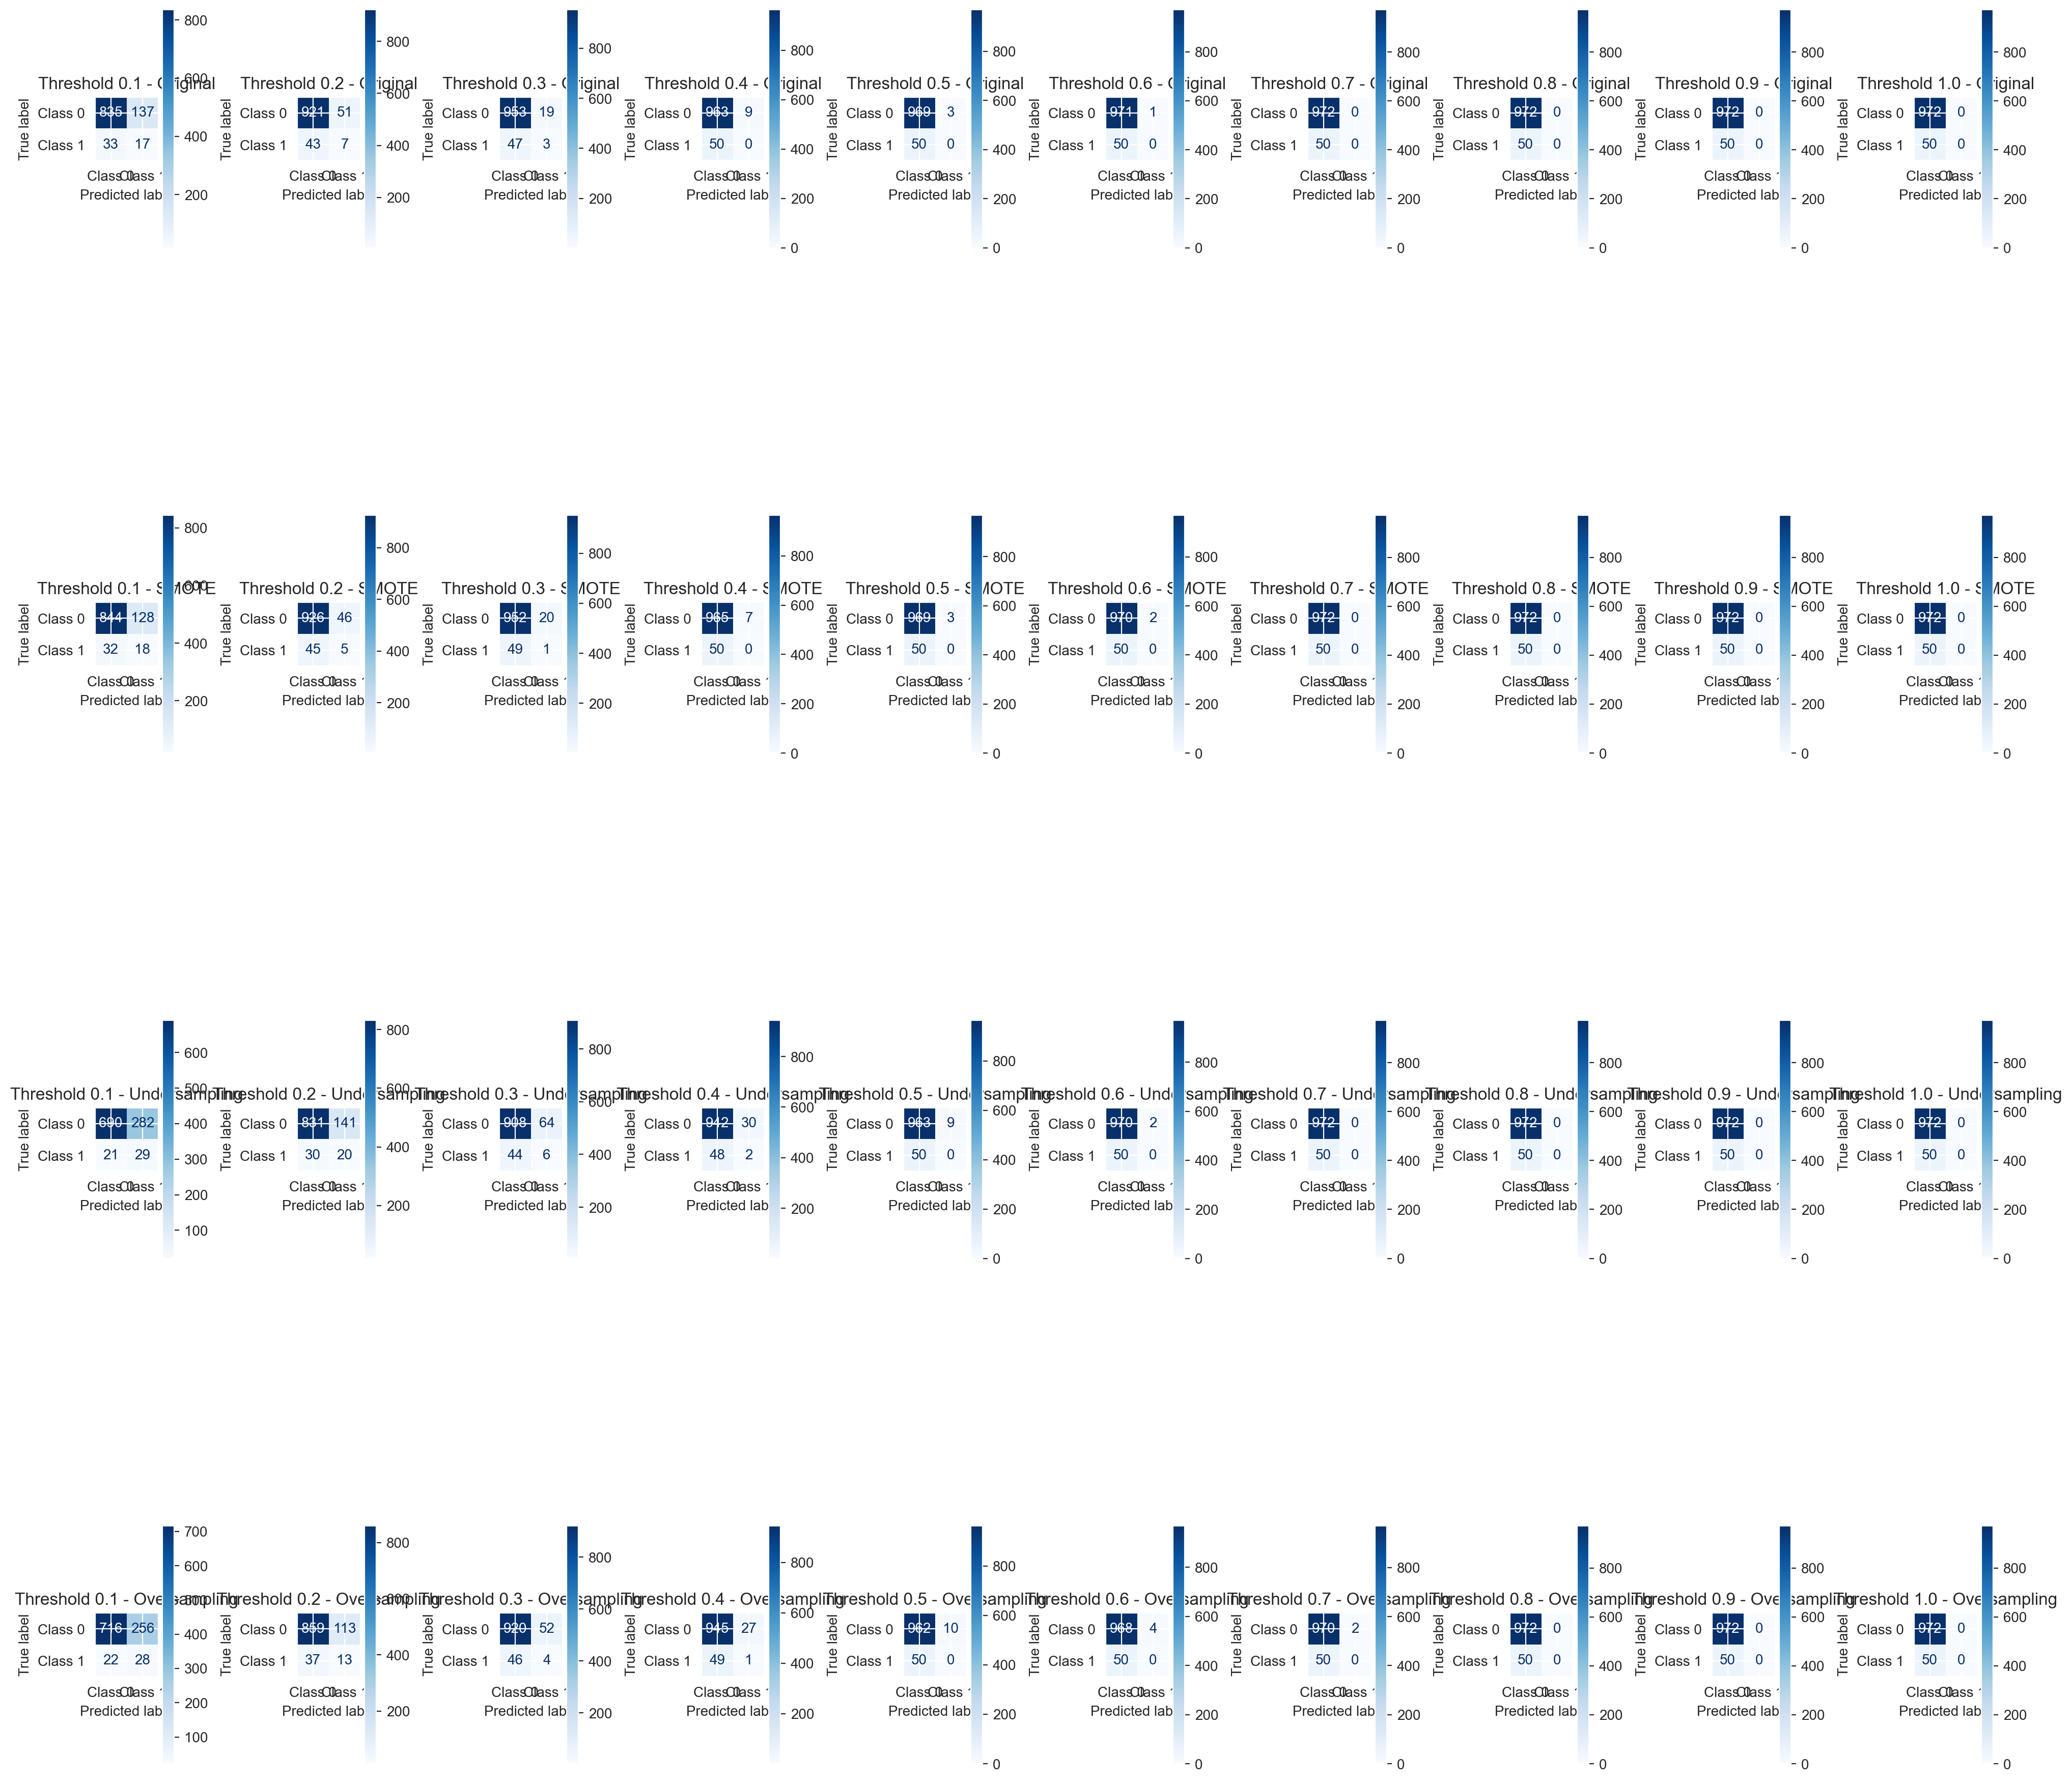

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import fbeta_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Define the threshold values
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create a figure with subplots for performance metrics
fig, axes = plt.subplots(len(data_scenarios), len(thresholds), figsize=(20, 5 * len(data_scenarios)))

# Iterate through the scenarios
for i, (scenario_name, X_train_scenario, y_train_scenario) in enumerate(data_scenarios):
    # Train the Logistic Regression model with GridSearchCV
    random_search_RF.fit(X_train_scenario, y_train_scenario)
    best_RF_model = random_search_RF.best_estimator_

    cv = StratifiedKFold(n_splits=10, shuffle=True)
    
    # Iterate through threshold values
    for j, threshold in enumerate(thresholds):
        y_pred_prob_cv = cross_val_predict(best_RF_model, X_test, y_test, cv=cv, method='predict_proba', n_jobs=-1)
        
        # Make predictions with probability scores based on the current threshold
        pred_prob = (y_pred_prob_cv[:, 1] > threshold).astype('int')

        # Compute the confusion matrix
        cm = confusion_matrix(y_test, pred_prob)
        
        # Create a ConfusionMatrixDisplay and plot it on the corresponding subplot
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
        disp.plot(cmap=plt.cm.Blues, values_format='d', ax=axes[i, j])
        
        # Add labels and title to the subplot
        axes[i, j].set_title(f'Threshold {threshold} - {scenario_name}')
        
        # Calculate and print the classification report
        class_report = classification_report(y_test, pred_prob)
        print(f'Classification Report for {scenario_name} at Threshold {threshold}:\n{class_report}')


        print(f'ROC AUC Score for {scenario_name} at Threshold {threshold}: {roc_auc_score(y_test, y_pred_prob_cv[:, 1]):.2f}')
        print("Balanced Accuracy Score for {scenario_name} at Threshold {threshold}:", balanced_accuracy_score(y_test, pred_prob))

# Adjust the layout to prevent overlapping titles
plt.tight_layout()
plt.show()


Classification Report for Original at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       972
           1       0.08      0.12      0.10        50

    accuracy                           0.89      1022
   macro avg       0.52      0.53      0.52      1022
weighted avg       0.91      0.89      0.90      1022

ROC AUC Score for Original at Threshold 0.1: 0.61
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5255349794238683
Classification Report for Original at Threshold 0.2:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       972
           1       0.08      0.08      0.08        50

    accuracy                           0.91      1022
   macro avg       0.52      0.52      0.52      1022
weighted avg       0.91      0.91      0.91      1022

ROC AUC Score for Original at Threshold 0.2: 0.64
Balanced Accuracy Score for {scenario_name} at Thre

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Original at Threshold 1.0:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Original at Threshold 1.0: 0.57
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5
Classification Report for SMOTE at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       972
           1       0.05      0.08      0.07        50

    accuracy                           0.89      1022
   macro avg       0.50      0.50      0.50      1022
weighted avg       0.91      0.89      0.90      1022

ROC AUC Score for SMOTE at Threshold 0.1: 0.66
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for SMOTE at Threshold 1.0:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for SMOTE at Threshold 1.0: 0.60
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5
Classification Report for Undersampling at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.99      0.43      0.60       972
           1       0.07      0.88      0.14        50

    accuracy                           0.45      1022
   macro avg       0.53      0.66      0.37      1022
weighted avg       0.94      0.45      0.58      1022

ROC AUC Score for Undersampling at Threshold 0.1: 0.73
Balanced Accuracy Score for {scenario_name} at Threshold {thre

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Undersampling at Threshold 0.9:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Undersampling at Threshold 0.9: 0.72
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Undersampling at Threshold 1.0:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Undersampling at Threshold 1.0: 0.74
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5
Classification Report for Oversampling at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       972
           1       0.08      0.10      0.09        50

    accuracy                           0.90      1022
   macro avg       0.51      0.52      0.52      1022
weighted avg       0.91      0.90      0.90      1022

ROC AUC Score for Oversampling at Threshold 0.1: 0.60
Balanced Accuracy Score for {scenario_name} at T

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Oversampling at Threshold 1.0:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Oversampling at Threshold 1.0: 0.60
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


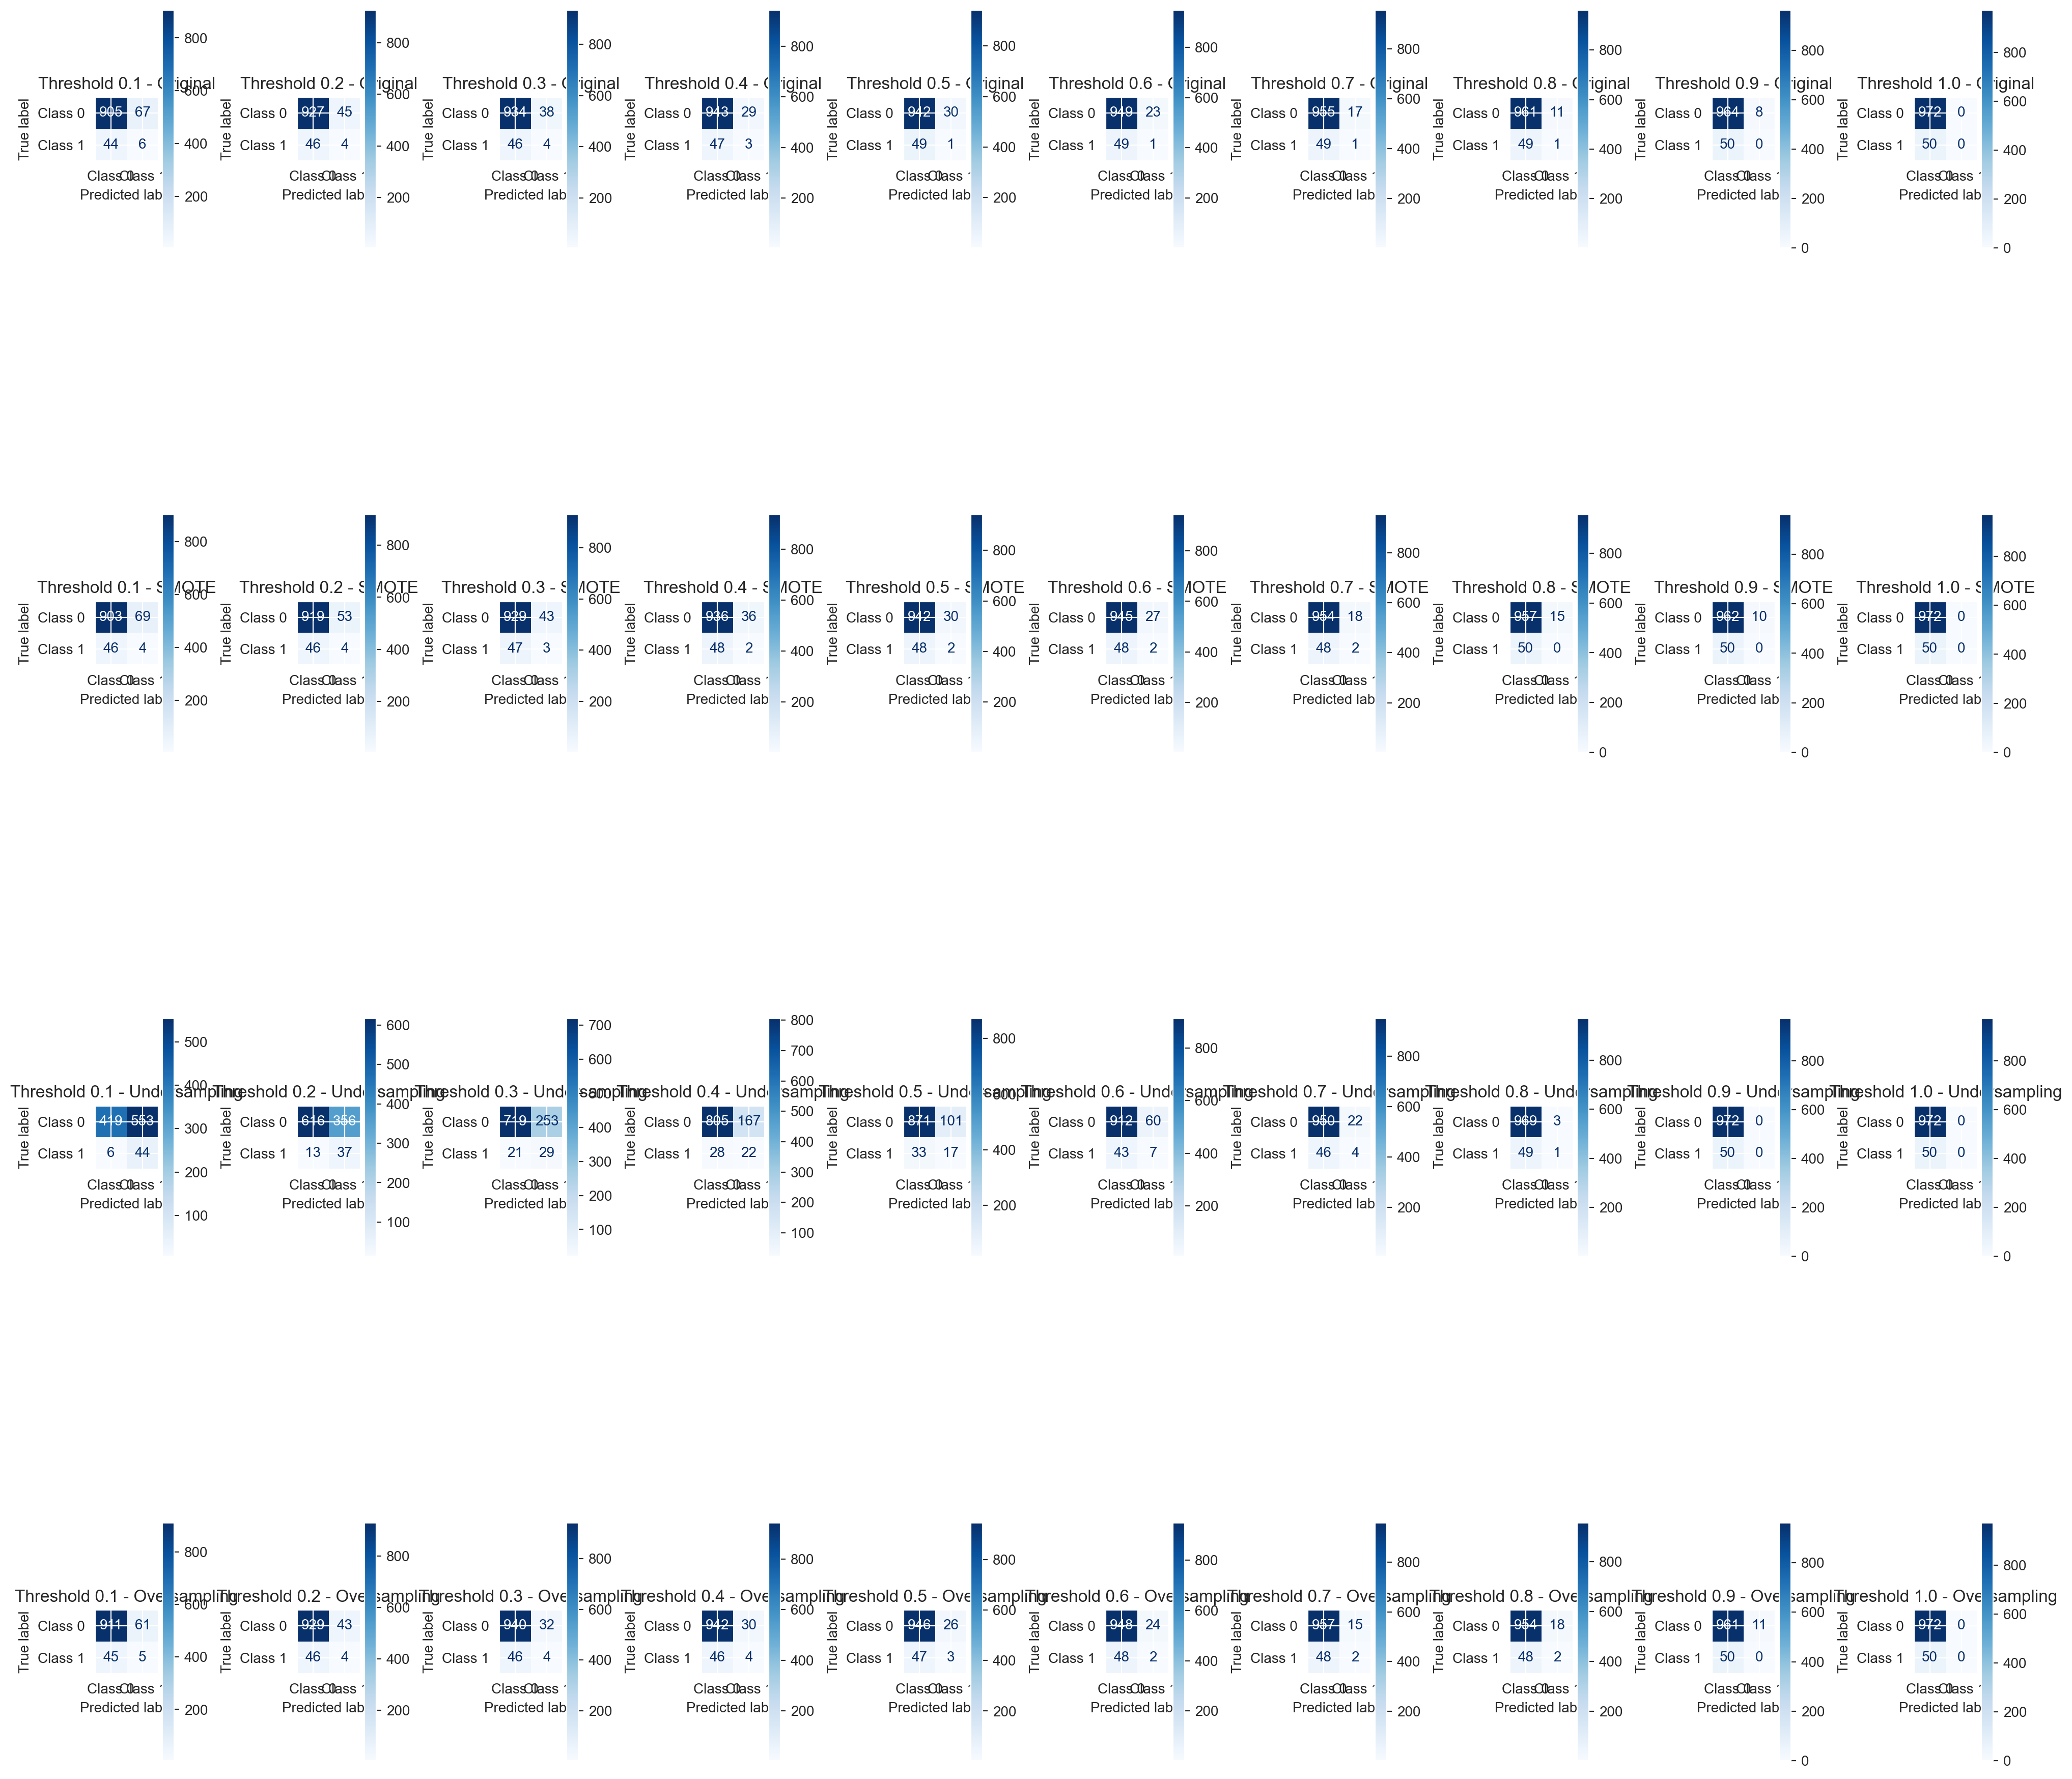

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import fbeta_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Define the threshold values
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create a figure with subplots for performance metrics
fig, axes = plt.subplots(len(data_scenarios), len(thresholds), figsize=(20, 5 * len(data_scenarios)))

# Iterate through the scenarios
for i, (scenario_name, X_train_scenario, y_train_scenario) in enumerate(data_scenarios):
    # Train the Logistic Regression model with GridSearchCV
    random_search_XGB.fit(X_train_scenario, y_train_scenario)
    best_XGB_model = random_search_XGB.best_estimator_

    cv = StratifiedKFold(n_splits=10, shuffle=True)
    
    # Iterate through threshold values
    for j, threshold in enumerate(thresholds):
        y_pred_prob_cv = cross_val_predict(best_XGB_model, X_test, y_test, cv=cv, method='predict_proba', n_jobs=-1)
        
        # Make predictions with probability scores based on the current threshold
        pred_prob = (y_pred_prob_cv[:, 1] > threshold).astype('int')

        # Compute the confusion matrix
        cm = confusion_matrix(y_test, pred_prob)
        
        # Create a ConfusionMatrixDisplay and plot it on the corresponding subplot
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
        disp.plot(cmap=plt.cm.Blues, values_format='d', ax=axes[i, j])
        
        # Add labels and title to the subplot
        axes[i, j].set_title(f'Threshold {threshold} - {scenario_name}')
        
        # Calculate and print the classification report
        class_report = classification_report(y_test, pred_prob)
        print(f'Classification Report for {scenario_name} at Threshold {threshold}:\n{class_report}')


        print(f'ROC AUC Score for {scenario_name} at Threshold {threshold}: {roc_auc_score(y_test, y_pred_prob_cv[:, 1]):.2f}')
        print("Balanced Accuracy Score for {scenario_name} at Threshold {threshold}:", balanced_accuracy_score(y_test, pred_prob))

# Adjust the layout to prevent overlapping titles
plt.tight_layout()
plt.show()


Classification Report for Original at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       972
           1       0.08      0.06      0.07        50

    accuracy                           0.92      1022
   macro avg       0.52      0.51      0.51      1022
weighted avg       0.91      0.92      0.92      1022

ROC AUC Score for Original at Threshold 0.1: 0.63
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5130246913580246
Classification Report for Original at Threshold 0.2:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       972
           1       0.12      0.10      0.11        50

    accuracy                           0.92      1022
   macro avg       0.54      0.53      0.53      1022
weighted avg       0.91      0.92      0.92      1022

ROC AUC Score for Original at Threshold 0.2: 0.62
Balanced Accuracy Score for {scenario_name} at Thre

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for SMOTE at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       972
           1       0.11      0.24      0.15        50

    accuracy                           0.87      1022
   macro avg       0.53      0.57      0.54      1022
weighted avg       0.92      0.87      0.89      1022

ROC AUC Score for SMOTE at Threshold 0.1: 0.63
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5695884773662552
Classification Report for SMOTE at Threshold 0.2:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       972
           1       0.08      0.12      0.09        50

    accuracy                           0.89      1022
   macro avg       0.51      0.52      0.52      1022
weighted avg       0.91      0.89      0.90      1022

ROC AUC Score for SMOTE at Threshold 0.2: 0.65
Balanced Accuracy Score for {scenario_name} at Threshold {thres

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for SMOTE at Threshold 1.0:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for SMOTE at Threshold 1.0: 0.65
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5
Classification Report for Undersampling at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       972
           1       0.09      0.32      0.14        50

    accuracy                           0.81      1022
   macro avg       0.52      0.58      0.52      1022
weighted avg       0.92      0.81      0.86      1022

ROC AUC Score for Undersampling at Threshold 0.1: 0.65
Balanced Accuracy Score for {scenario_name} at Threshold {thre

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Oversampling at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       972
           1       0.14      0.26      0.18        50

    accuracy                           0.88      1022
   macro avg       0.55      0.59      0.56      1022
weighted avg       0.92      0.88      0.90      1022

ROC AUC Score for Oversampling at Threshold 0.1: 0.64
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5878189300411523
Classification Report for Oversampling at Threshold 0.2:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       972
           1       0.14      0.20      0.16        50

    accuracy                           0.90      1022
   macro avg       0.55      0.57      0.55      1022
weighted avg       0.92      0.90      0.91      1022

ROC AUC Score for Oversampling at Threshold 0.2: 0.64
Balanced Accuracy Score for {scenar

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Oversampling at Threshold 1.0:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Oversampling at Threshold 1.0: 0.66
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


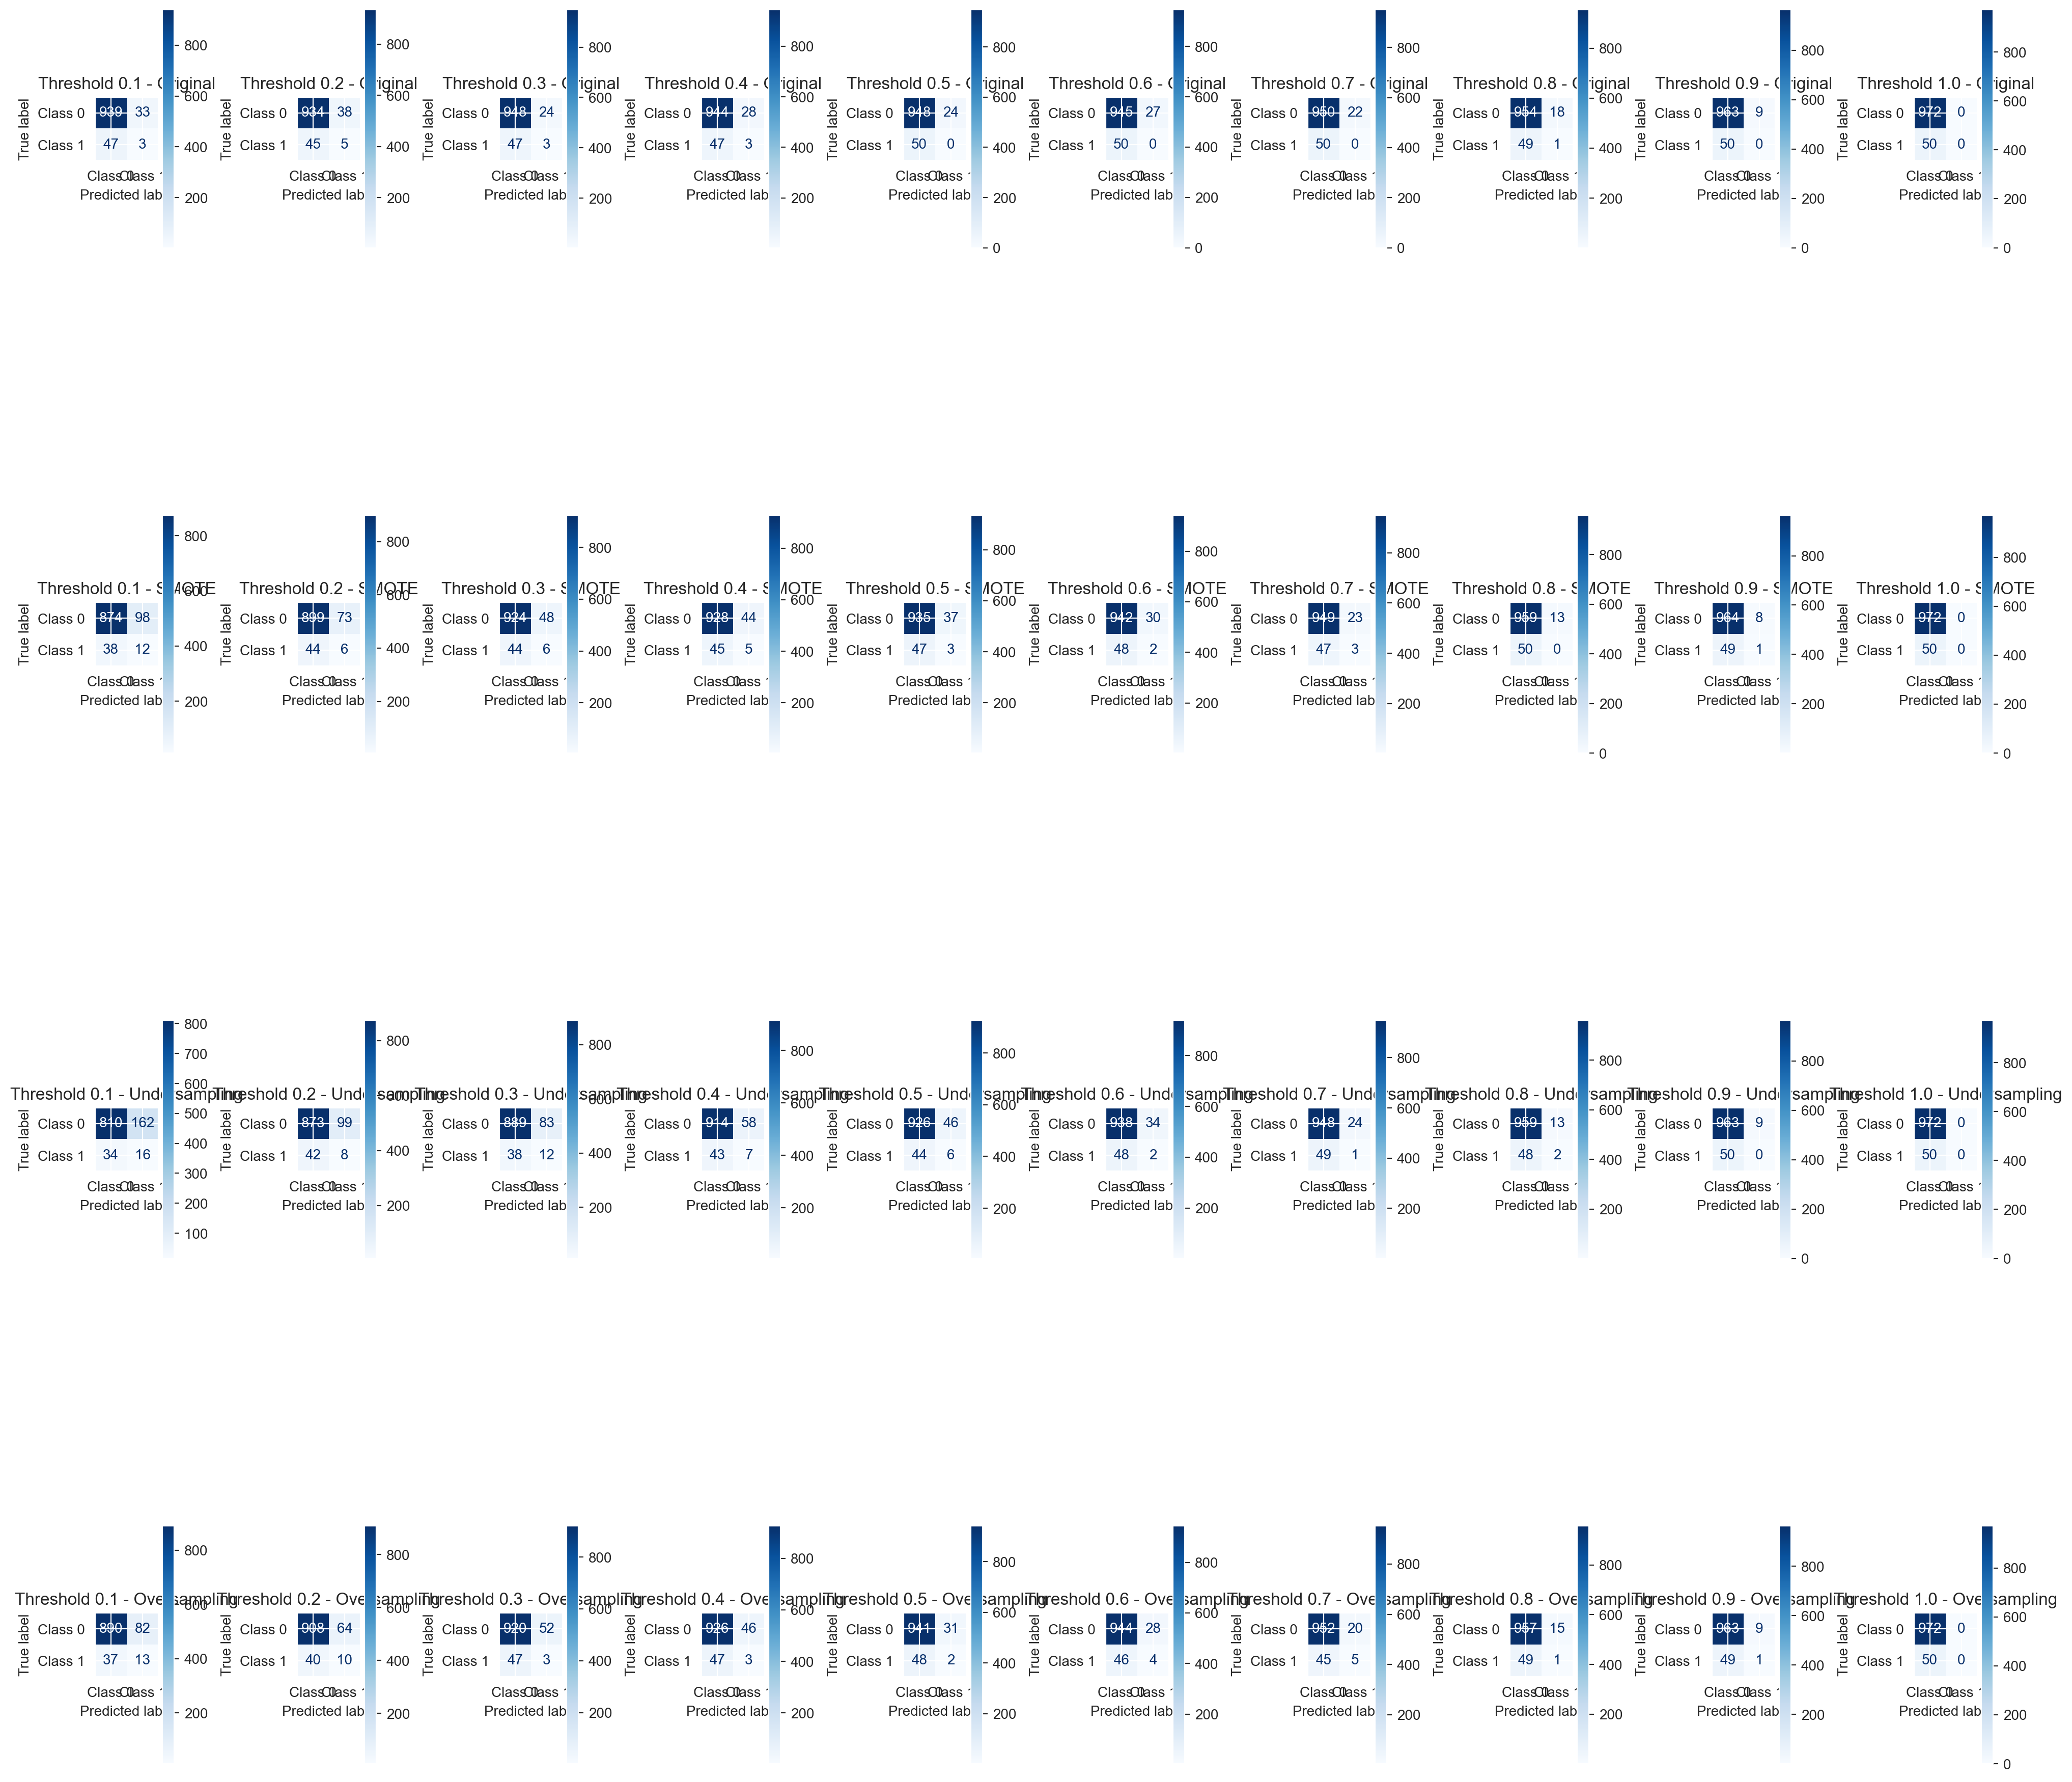

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import fbeta_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Define the threshold values
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create a figure with subplots for performance metrics
fig, axes = plt.subplots(len(data_scenarios), len(thresholds), figsize=(20, 5 * len(data_scenarios)))

# Iterate through the scenarios
for i, (scenario_name, X_train_scenario, y_train_scenario) in enumerate(data_scenarios):
    # Train the Logistic Regression model with GridSearchCV
    random_search_Light.fit(X_train_scenario, y_train_scenario)
    best_Light_model = random_search_Light.best_estimator_

    cv = StratifiedKFold(n_splits=10, shuffle=True)
    
    # Iterate through threshold values
    for j, threshold in enumerate(thresholds):
        y_pred_prob_cv = cross_val_predict(best_Light_model, X_test, y_test, cv=cv, method='predict_proba', n_jobs=-1)
        
        # Make predictions with probability scores based on the current threshold
        pred_prob = (y_pred_prob_cv[:, 1] > threshold).astype('int')

        # Compute the confusion matrix
        cm = confusion_matrix(y_test, pred_prob)
        
        # Create a ConfusionMatrixDisplay and plot it on the corresponding subplot
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
        disp.plot(cmap=plt.cm.Blues, values_format='d', ax=axes[i, j])
        
        # Add labels and title to the subplot
        axes[i, j].set_title(f'Threshold {threshold} - {scenario_name}')
        
        # Calculate and print the classification report
        class_report = classification_report(y_test, pred_prob)
        print(f'Classification Report for {scenario_name} at Threshold {threshold}:\n{class_report}')

        print(f'ROC AUC Score for {scenario_name} at Threshold {threshold}: {roc_auc_score(y_test, y_pred_prob_cv[:, 1]):.2f}')
        print("Balanced Accuracy Score for {scenario_name} at Threshold {threshold}:", balanced_accuracy_score(y_test, pred_prob))

# Adjust the layout to prevent overlapping titles
plt.tight_layout()
plt.show()


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Classification Report for Original at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.99      0.60      0.74       972
           1       0.10      0.84      0.17        50

    accuracy                           0.61      1022
   macro avg       0.54      0.72      0.46      1022
weighted avg       0.94      0.61      0.72      1022

ROC AUC Score for Original at Threshold 0.1: 0.70
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.7188683127572016


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Original at Threshold 0.2:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Original at Threshold 0.2: 0.71
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Original at Threshold 0.3:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Original at Threshold 0.3: 0.71
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Original at Threshold 0.4:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Original at Threshold 0.4: 0.71
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Original at Threshold 0.5:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Original at Threshold 0.5: 0.71
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Original at Threshold 0.6:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Original at Threshold 0.6: 0.70
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Original at Threshold 0.7:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Original at Threshold 0.7: 0.70
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Original at Threshold 0.8:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Original at Threshold 0.8: 0.70
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Original at Threshold 0.9:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Original at Threshold 0.9: 0.70
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Original at Threshold 1.0:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Original at Threshold 1.0: 0.71
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for SMOTE at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       972
           1       0.05      1.00      0.09        50

    accuracy                           0.05      1022
   macro avg       0.02      0.50      0.05      1022
weighted avg       0.00      0.05      0.00      1022

ROC AUC Score for SMOTE at Threshold 0.1: 0.61
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for SMOTE at Threshold 0.2:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       972
           1       0.05      1.00      0.09        50

    accuracy                           0.05      1022
   macro avg       0.02      0.50      0.05      1022
weighted avg       0.00      0.05      0.00      1022

ROC AUC Score for SMOTE at Threshold 0.2: 0.61
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for SMOTE at Threshold 0.3:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       972
           1       0.05      1.00      0.09        50

    accuracy                           0.05      1022
   macro avg       0.02      0.50      0.05      1022
weighted avg       0.00      0.05      0.00      1022

ROC AUC Score for SMOTE at Threshold 0.3: 0.61
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for SMOTE at Threshold 0.4:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       972
           1       0.05      1.00      0.09        50

    accuracy                           0.05      1022
   macro avg       0.02      0.50      0.05      1022
weighted avg       0.00      0.05      0.00      1022

ROC AUC Score for SMOTE at Threshold 0.4: 0.61
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5
Classification Report for SMOTE at Threshold 0.5:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.94      1022
   macro avg       0.48      0.49      0.48      1022
weighted avg       0.90      0.94      0.92      1022

ROC AUC Score for SMOTE at Threshold 0.5: 0.63
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.492283

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for SMOTE at Threshold 0.6:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for SMOTE at Threshold 0.6: 0.60
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for SMOTE at Threshold 0.7:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for SMOTE at Threshold 0.7: 0.63
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for SMOTE at Threshold 0.8:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for SMOTE at Threshold 0.8: 0.62
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for SMOTE at Threshold 0.9:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for SMOTE at Threshold 0.9: 0.62
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for SMOTE at Threshold 1.0:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for SMOTE at Threshold 1.0: 0.61
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5
Classification Report for Undersampling at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.99      0.60      0.74       972
           1       0.10      0.84      0.17        50

    accuracy                           0.61      1022
   macro avg       0.54      0.72      0.46      1022
weighted avg       0.94      0.61      0.72      1022

ROC AUC Score for Undersampling at Threshold 0.1: 0.70
Balanced Accuracy Score for {scenario_name} at Threshold {thre

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Undersampling at Threshold 0.2:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Undersampling at Threshold 0.2: 0.70
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Undersampling at Threshold 0.3:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Undersampling at Threshold 0.3: 0.68
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Undersampling at Threshold 0.4:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Undersampling at Threshold 0.4: 0.70
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Undersampling at Threshold 0.5:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Undersampling at Threshold 0.5: 0.71
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Undersampling at Threshold 0.6:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Undersampling at Threshold 0.6: 0.71
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Undersampling at Threshold 0.7:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Undersampling at Threshold 0.7: 0.70
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Undersampling at Threshold 0.8:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Undersampling at Threshold 0.8: 0.71
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Undersampling at Threshold 0.9:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Undersampling at Threshold 0.9: 0.71
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Undersampling at Threshold 1.0:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Undersampling at Threshold 1.0: 0.70
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Oversampling at Threshold 0.1:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       972
           1       0.05      1.00      0.09        50

    accuracy                           0.05      1022
   macro avg       0.02      0.50      0.05      1022
weighted avg       0.00      0.05      0.00      1022

ROC AUC Score for Oversampling at Threshold 0.1: 0.63
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Oversampling at Threshold 0.2:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       972
           1       0.05      1.00      0.09        50

    accuracy                           0.05      1022
   macro avg       0.02      0.50      0.05      1022
weighted avg       0.00      0.05      0.00      1022

ROC AUC Score for Oversampling at Threshold 0.2: 0.60
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Oversampling at Threshold 0.3:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       972
           1       0.05      1.00      0.09        50

    accuracy                           0.05      1022
   macro avg       0.02      0.50      0.05      1022
weighted avg       0.00      0.05      0.00      1022

ROC AUC Score for Oversampling at Threshold 0.3: 0.61
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Oversampling at Threshold 0.4:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       972
           1       0.05      1.00      0.09        50

    accuracy                           0.05      1022
   macro avg       0.02      0.50      0.05      1022
weighted avg       0.00      0.05      0.00      1022

ROC AUC Score for Oversampling at Threshold 0.4: 0.62
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5
Classification Report for Oversampling at Threshold 0.5:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.94      1022
   macro avg       0.48      0.49      0.48      1022
weighted avg       0.90      0.94      0.92      1022

ROC AUC Score for Oversampling at Threshold 0.5: 0.64
Balanced Accuracy Score for {scenario_name} at Thr

/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Oversampling at Threshold 0.6:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Oversampling at Threshold 0.6: 0.59
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Oversampling at Threshold 0.7:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Oversampling at Threshold 0.7: 0.61
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Oversampling at Threshold 0.8:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Oversampling at Threshold 0.8: 0.60
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Oversampling at Threshold 0.9:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Oversampling at Threshold 0.9: 0.59
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/potcharadockchaam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification Report for Oversampling at Threshold 1.0:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score for Oversampling at Threshold 1.0: 0.61
Balanced Accuracy Score for {scenario_name} at Threshold {threshold}: 0.5


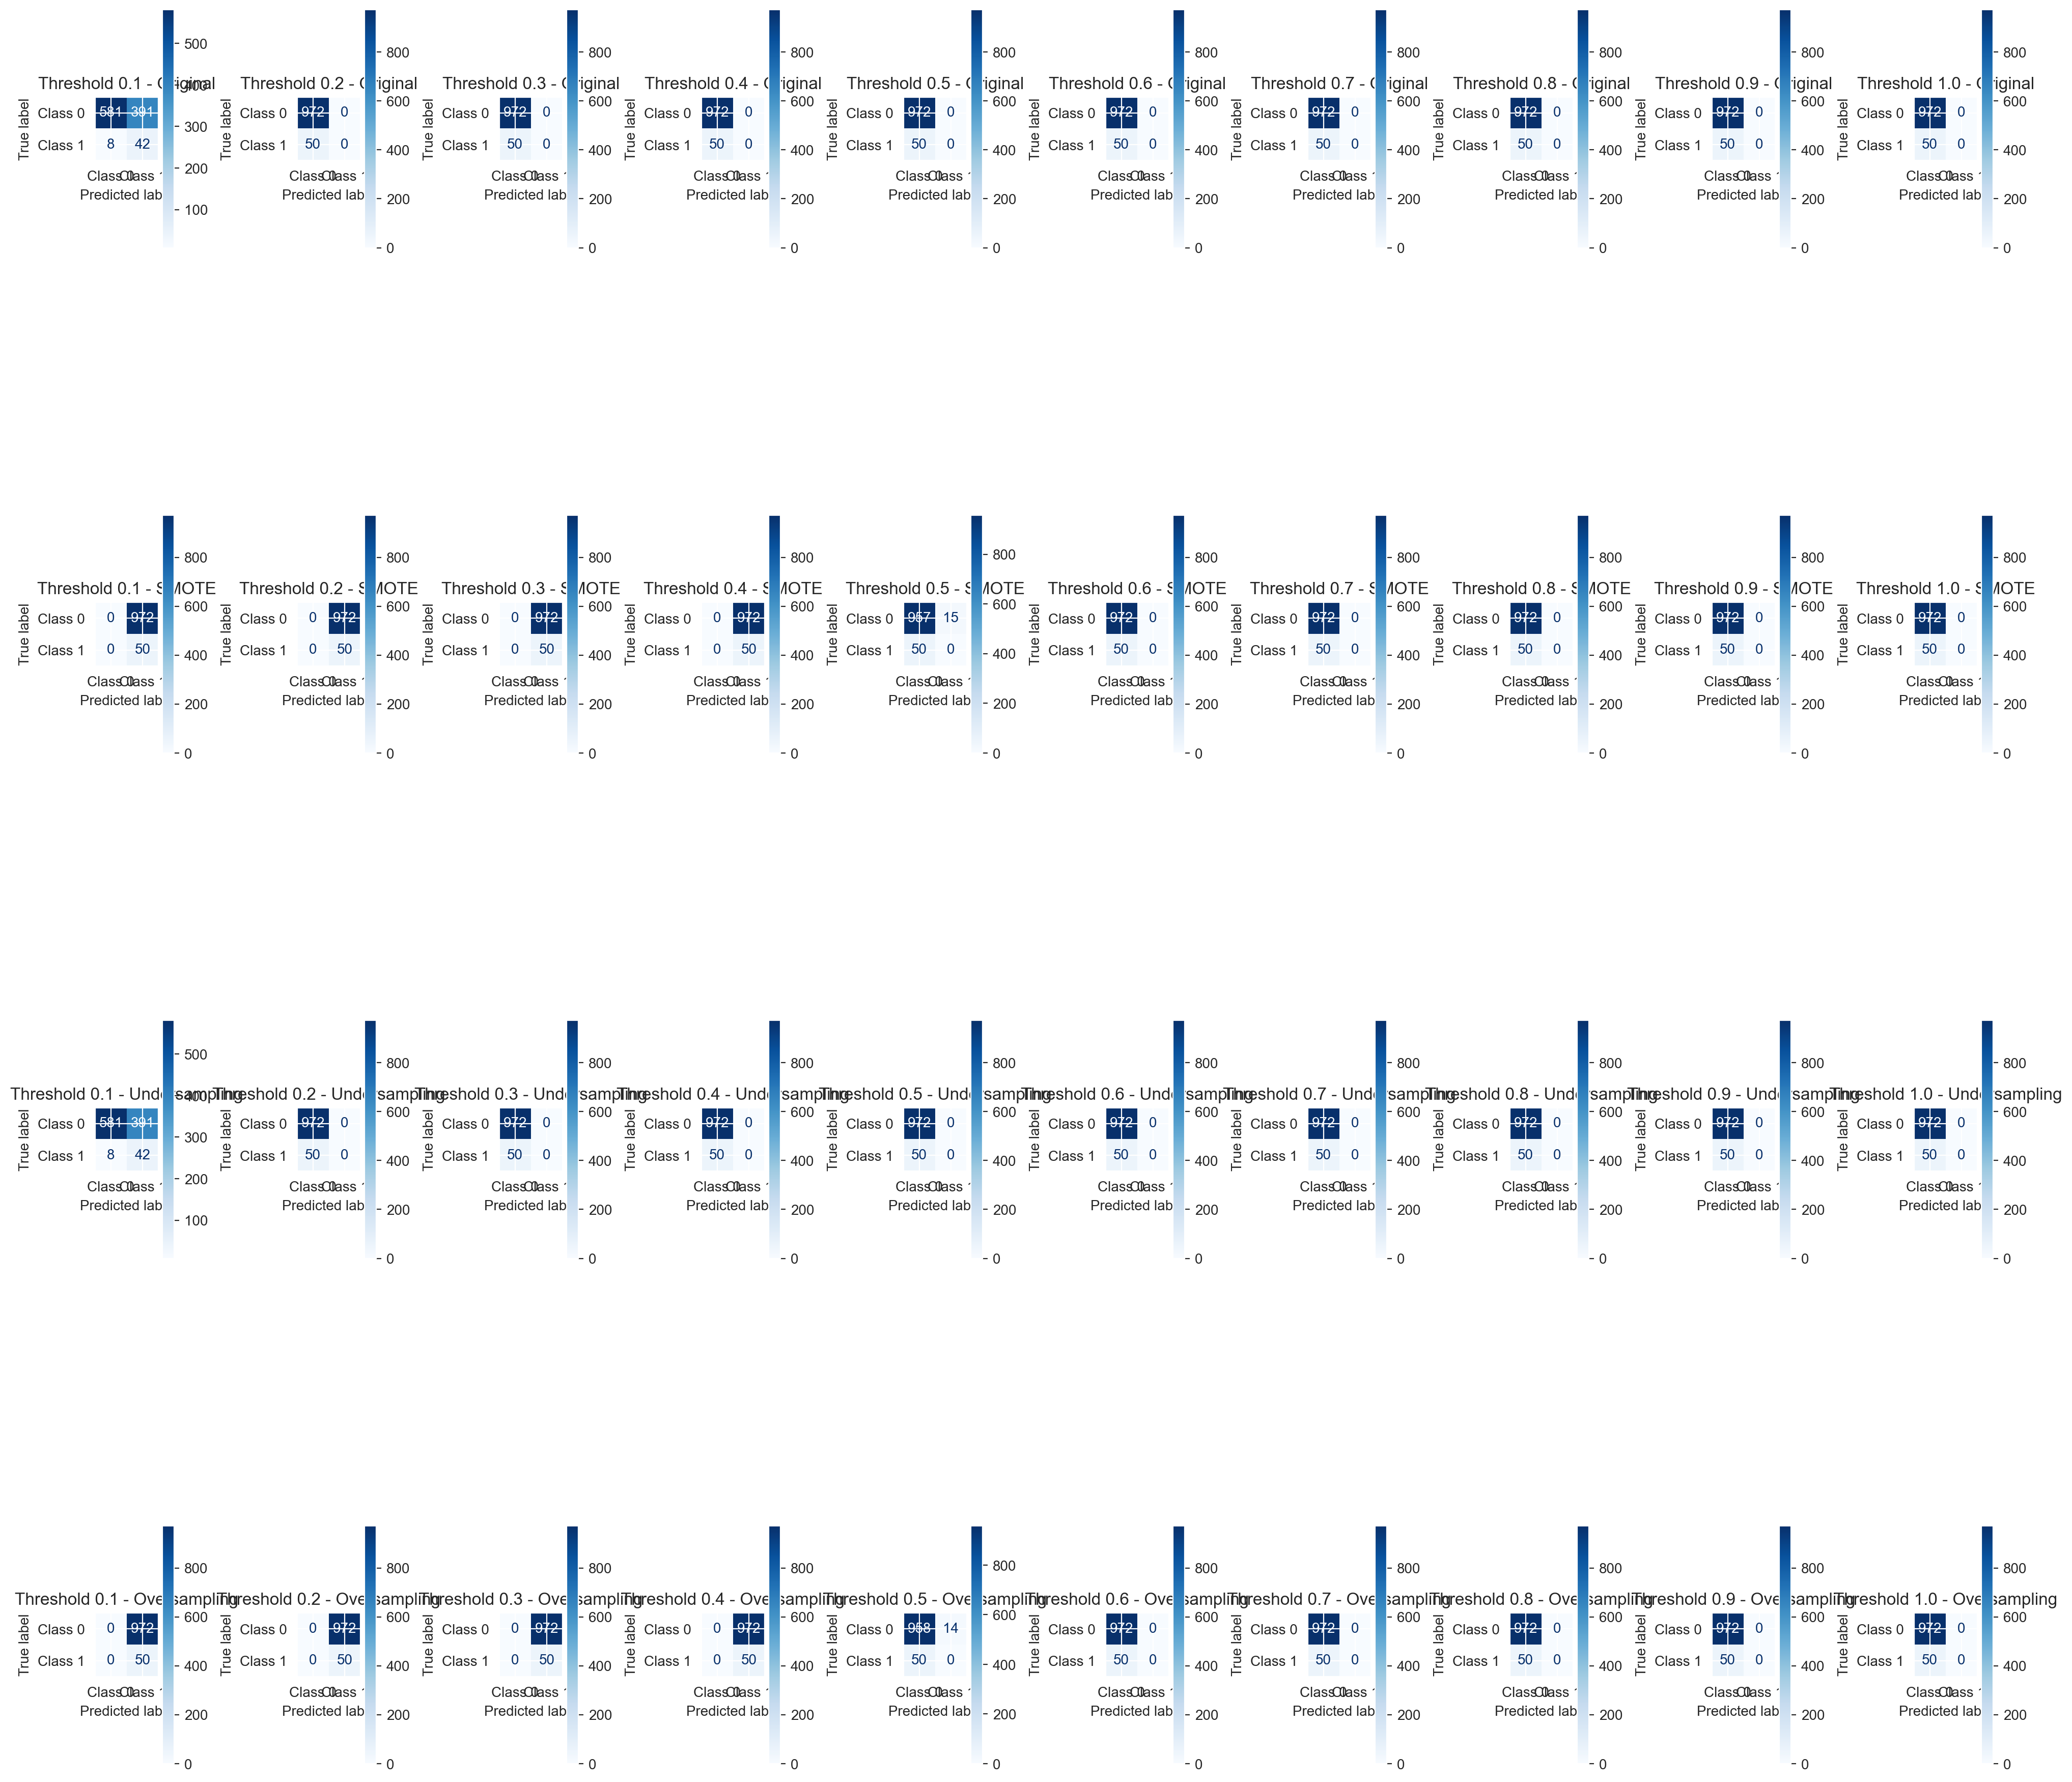

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import fbeta_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Define the threshold values
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create a figure with subplots for performance metrics
fig, axes = plt.subplots(len(data_scenarios), len(thresholds), figsize=(20, 5 * len(data_scenarios)))

# Iterate through the scenarios
for i, (scenario_name, X_train_scenario, y_train_scenario) in enumerate(data_scenarios):
    # Train the Logistic Regression model with GridSearchCV
    random_search_ADA.fit(X_train_scenario, y_train_scenario)
    best_ADA_model = random_search_ADA.best_estimator_

    cv = StratifiedKFold(n_splits=10, shuffle=True)
    
    # Iterate through threshold values
    for j, threshold in enumerate(thresholds):
        y_pred_prob_cv = cross_val_predict(best_ADA_model, X_test, y_test, cv=cv, method='predict_proba', n_jobs=-1)
        
        # Make predictions with probability scores based on the current threshold
        pred_prob = (y_pred_prob_cv[:, 1] > threshold).astype('int')

        # Compute the confusion matrix
        cm = confusion_matrix(y_test, pred_prob)
        
        # Create a ConfusionMatrixDisplay and plot it on the corresponding subplot
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
        disp.plot(cmap=plt.cm.Blues, values_format='d', ax=axes[i, j])
        
        # Add labels and title to the subplot
        axes[i, j].set_title(f'Threshold {threshold} - {scenario_name}')
        
        # Calculate and print the classification report
        class_report = classification_report(y_test, pred_prob)
        print(f'Classification Report for {scenario_name} at Threshold {threshold}:\n{class_report}')


        print(f'ROC AUC Score for {scenario_name} at Threshold {threshold}: {roc_auc_score(y_test, y_pred_prob_cv[:, 1]):.2f}')
        print("Balanced Accuracy Score for {scenario_name} at Threshold {threshold}:", balanced_accuracy_score(y_test, pred_prob))

# Adjust the layout to prevent overlapping titles
plt.tight_layout()
plt.show()


0:	learn: 0.4591870	total: 58.7ms	remaining: 11.7s
1:	learn: 0.4335582	total: 59.7ms	remaining: 5.91s
2:	learn: 0.3639127	total: 61.3ms	remaining: 4.03s
0:	learn: 0.4823496	total: 59.1ms	remaining: 11.8s
0:	learn: 0.4745925	total: 59.3ms	remaining: 11.8s
1:	learn: 0.4605007	total: 60.6ms	remaining: 6s
0:	learn: 0.4716192	total: 58.2ms	remaining: 11.6s
3:	learn: 0.3133593	total: 64ms	remaining: 3.14s
1:	learn: 0.4427506	total: 59.4ms	remaining: 5.88s
2:	learn: 0.3836994	total: 63ms	remaining: 4.14s
1:	learn: 0.3950257	total: 61.8ms	remaining: 6.12s
0:	learn: 0.4878382	total: 58ms	remaining: 11.5s
0:	learn: 0.4756851	total: 58.9ms	remaining: 11.7s
4:	learn: 0.2963186	total: 66.2ms	remaining: 2.58s
2:	learn: 0.3864634	total: 61.7ms	remaining: 4.05s
2:	learn: 0.3317766	total: 63.6ms	remaining: 4.18s
3:	learn: 0.3615461	total: 65.2ms	remaining: 3.19s
1:	learn: 0.4228328	total: 60.5ms	remaining: 5.99s
1:	learn: 0.4298065	total: 61.6ms	remaining: 6.1s
5:	learn: 0.2355597	total: 69.2ms	remaini

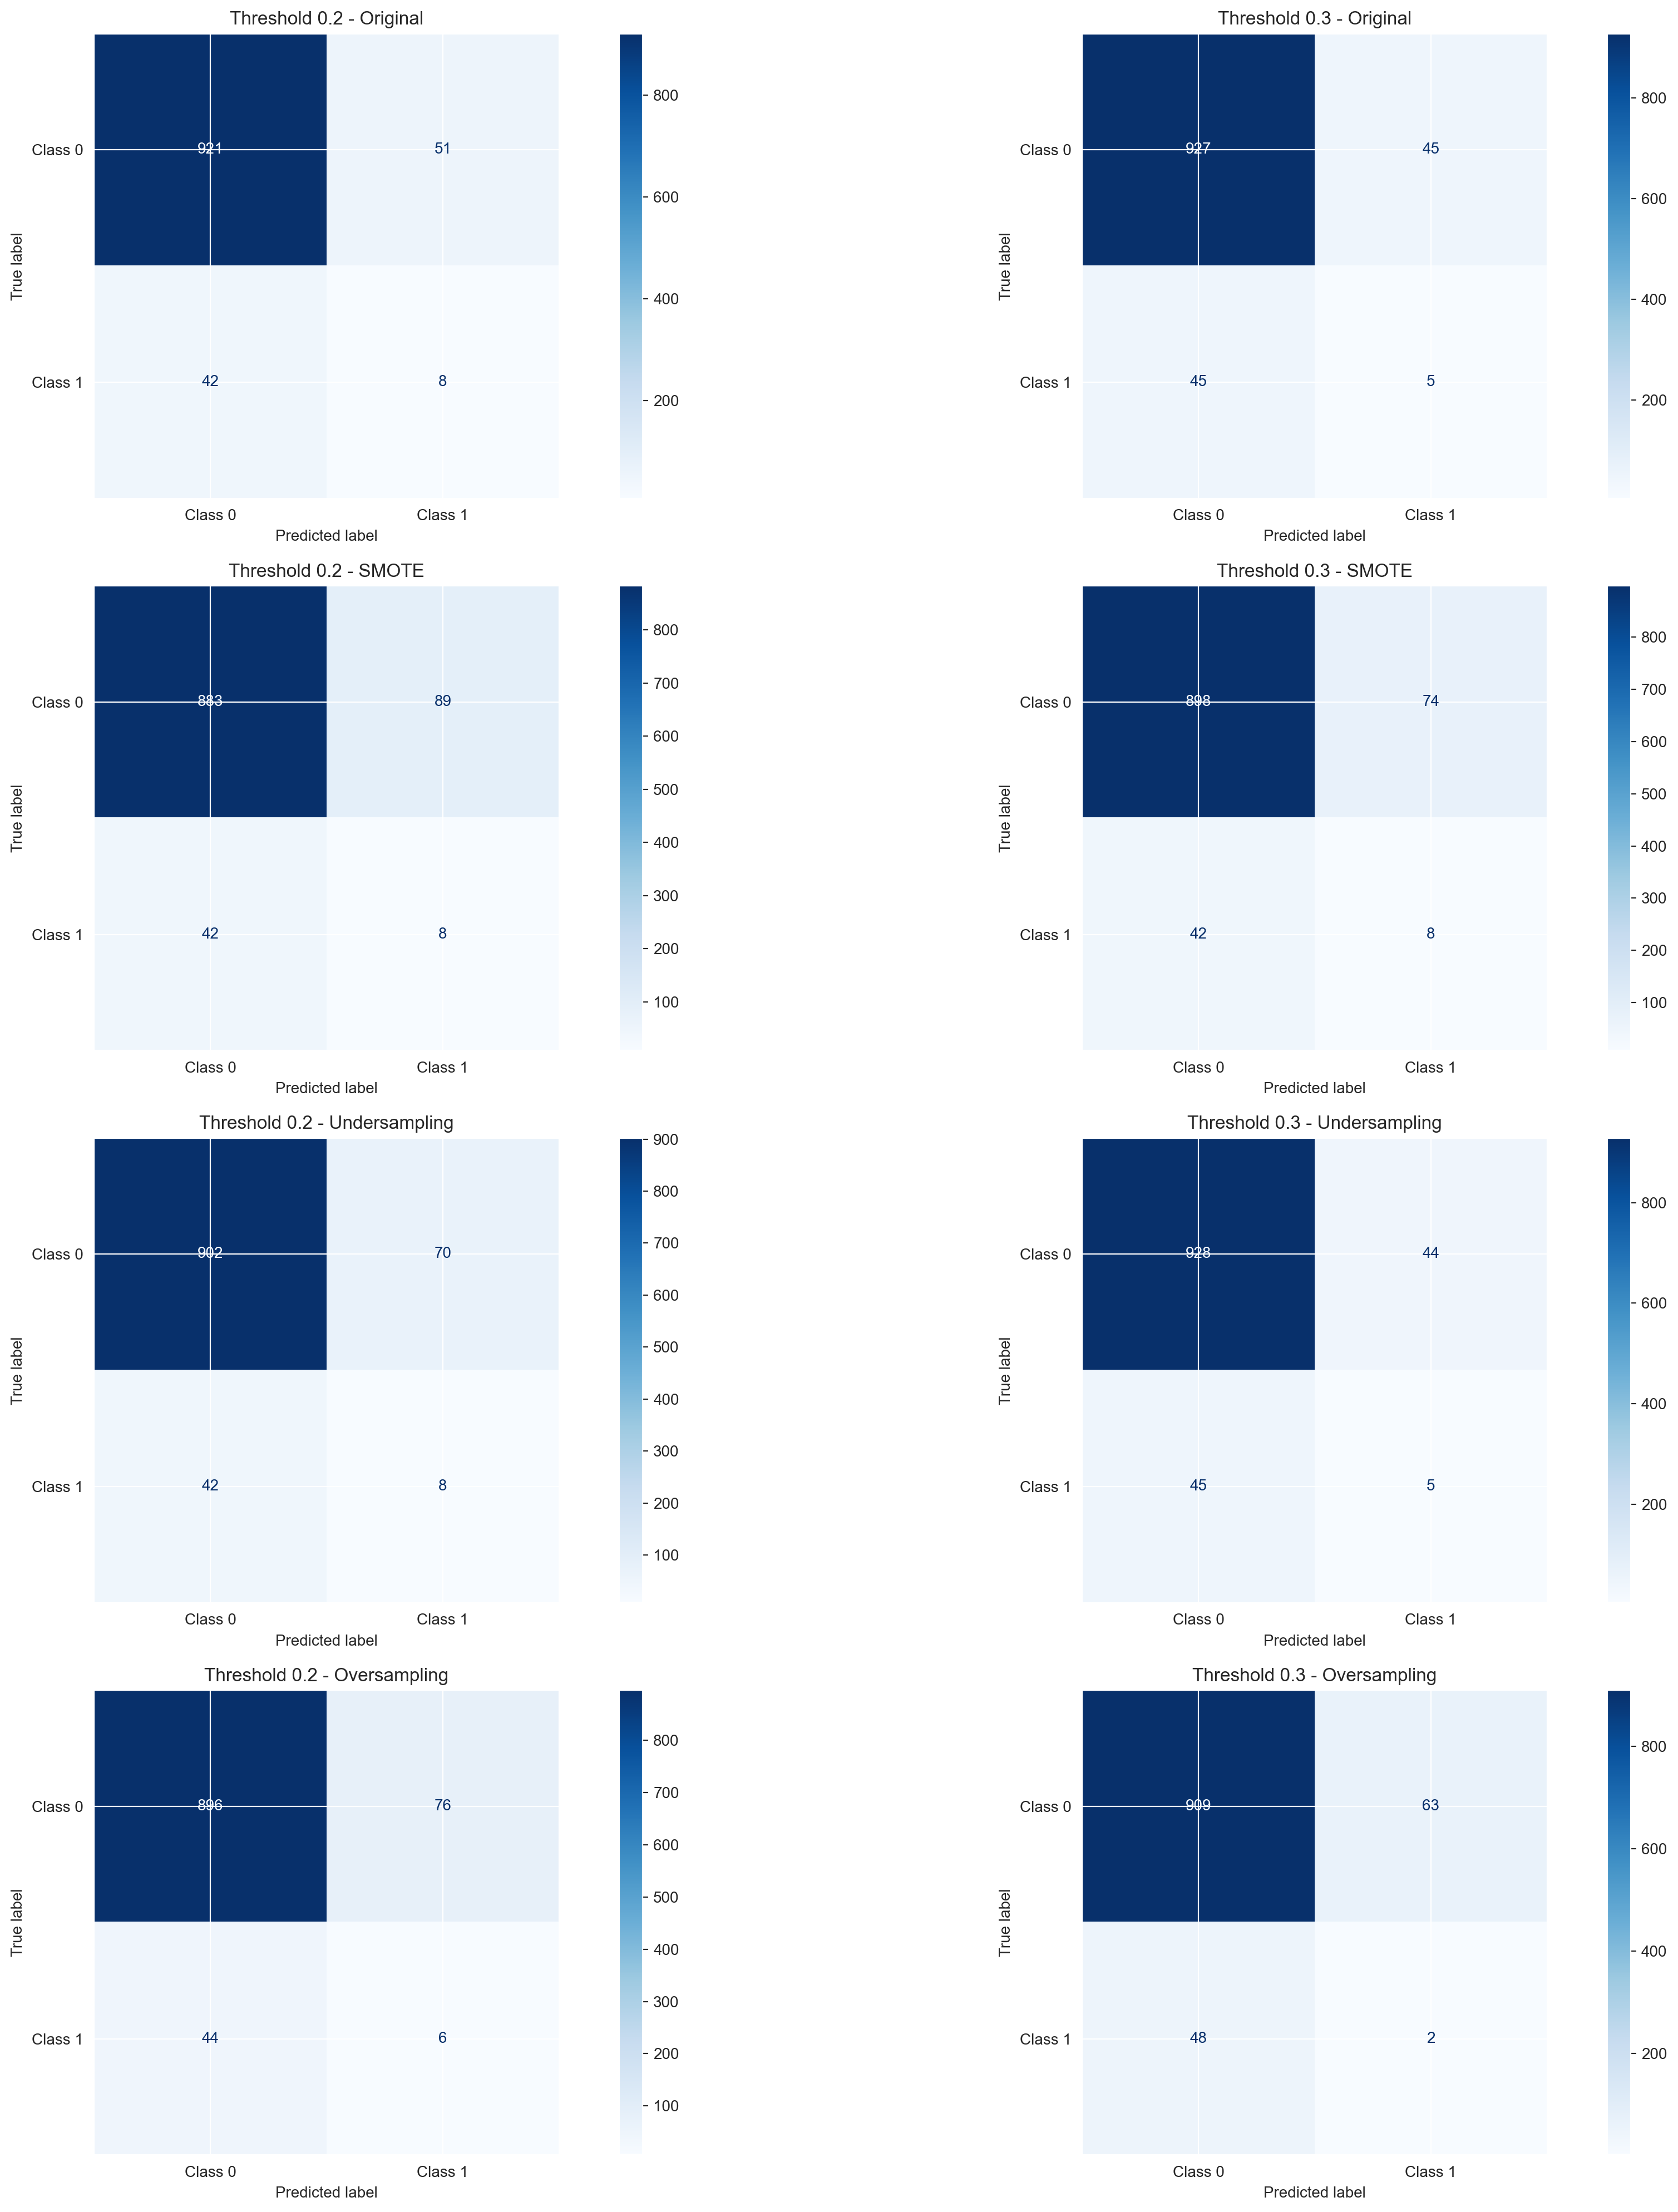

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import fbeta_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Define the threshold values
thresholds = [0.2,0.3]
#thresholds = [0.1,0.2,0.3,0.4,0.5]

# Create a figure with subplots for performance metrics
fig, axes = plt.subplots(len(data_scenarios), len(thresholds), figsize=(20, 5 * len(data_scenarios)))

# Iterate through the scenarios
for i, (scenario_name, X_train_scenario, y_train_scenario) in enumerate(data_scenarios):
    # Train the Logistic Regression model with GridSearchCV
    random_search_CAT.fit(X_train_scenario, y_train_scenario, verbose=False)
    best_CAT_model = random_search_CAT.best_estimator_

    cv = StratifiedKFold(n_splits=10, shuffle=True)
    
    # Iterate through threshold values
    for j, threshold in enumerate(thresholds):
        y_pred_prob_cv = cross_val_predict(best_CAT_model, X_test, y_test, cv=cv, method='predict_proba', n_jobs=-1)
        
        # Make predictions with probability scores based on the current threshold
        pred_prob = (y_pred_prob_cv[:, 1] > threshold).astype('int')

        # Compute the confusion matrix
        cm = confusion_matrix(y_test, pred_prob)
        
        # Create a ConfusionMatrixDisplay and plot it on the corresponding subplot
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
        disp.plot(cmap=plt.cm.Blues, values_format='d', ax=axes[i, j])
        
        # Add labels and title to the subplot
        axes[i, j].set_title(f'Threshold {threshold} - {scenario_name}')
        
        # Calculate and print the classification report
        class_report = classification_report(y_test, pred_prob)
        print(f'Classification Report for {scenario_name} at Threshold {threshold}:\n{class_report}')


        print(f'ROC AUC Score for {scenario_name} at Threshold {threshold}: {roc_auc_score(y_test, y_pred_prob_cv[:, 1]):.2f}')
        print("Balanced Accuracy Score for {scenario_name} at Threshold {threshold}:", balanced_accuracy_score(y_test, pred_prob))

# Adjust the layout to prevent overlapping titles
plt.tight_layout()
plt.show()
